### Model 2: Topic Modeling : BERTopic

In [ ]:
!pip install torch transformers


In [ ]:
!pip install bitsandbytes


In [ ]:
!pip install bertopic

In [ ]:
import pandas as pd
df = pd.read_csv('BA_Airline_NegativeReviews_Half.csv')
df.head()

OverallRating                     ReviewHeader  \
0              1  Service level far worse Ryanair   
1              3  not upgrade member based status   
2              1      Absolutely hopeless airline   
3              1    Customer Service non existent   
4              1     I cant imagine worst airline   

                                          ReviewBody       SeatType  \
0  4 Hours takeoff received Mail stating cryptic ...  Economy Class   
1  I recently delay British Airways BRU LHR due s...  Economy Class   
2  5 day flight advised BA cancelled asked u rebo...  Economy Class   
3  We traveled Lisbon dream vacation cruise Portu...  Economy Class   
4  Booked flight Bucharest Manchester 2h 45 layov...  Economy Class   

   SeatComfort  CabinStaffService  GroundService  ValueForMoney  Recommended  \
0            1                  1              1              1            0   
1            2                  3              1              2            0   
2            3                  3              1              1            0   
3            1                  1              1              1            0   
4            1                  1              1              1            0   

   Food&Beverages  InflightEntertainment  
0               3                      3  
1               1                      2  
2               3                      3  
3               1                      1  
4               1                      1

In [ ]:
print('Quantity of negative reviews: ', len(df['ReviewBody']))

Quantity of negative reviews:  1102


In [ ]:
# 1. Install required libraries
!pip uninstall -y numpy scipy gensim bertopic umap-learn hdbscan sentence-transformers plotly flair num2words torch torchvision bitsandbytes transformers

In [ ]:
# Reinstall core libraries and their dependencies in a single step
# This allows pip to find compatible versions for all packages
# Remove explicit version constraints for torch, torchvision, and transformers
!pip install numpy scipy gensim bertopic umap-learn hdbscan sentence-transformers plotly flair num2words bitsandbytes

## 1. Pure-BERTopic - MultiClasses for each review max no.of classes for each review is 5

In [ ]:
# standard NLP / preprocessing imports
import re
import nltk
import pandas as pd
from num2words import num2words
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict, Counter
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# NLTK stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# BERTopic-specific imports (in place of LDA + pyLDAvis)
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from hdbscan import HDBSCAN



In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from hdbscan import HDBSCAN
#load data
file_path = 'BA_Airline_NegativeReviews_Half.csv'
df = pd.read_csv(file_path)

df1=df.copy()

# Tokenization already done: df['tokens']
df1['tokens'] = df['ReviewBody'].apply(lambda x: x.split())

nltk_stopwords = set(stopwords.words('english'))

#define custom stopwords to remove (lowercase for matching)
custom_stopwords = {'u', 'us', 'could', 'would', 'ba', 'british', 'airways', 'flight', 'airline', 'hour', 'and','BA','Ba','British','Airways','heathrow','london'}
all_stopwords = nltk_stopwords.union(custom_stopwords)

#remove these stopwords from the token list
df1['tokens'] = df1['tokens'].apply(
    lambda tokens: [token for token in tokens if token.lower() not in all_stopwords and not re.search(r'\d', token)])

# remove numbers from the token list
df1['tokens'] = df1['tokens'].apply(lambda tokens: [re.sub(r'\d+', '', word) for word in tokens if not word.isnumeric()])

# 1) Join tokens back into a single string for each document
df1['processed'] = df1['tokens'].apply(lambda tokens: " ".join(tokens))

# 2) Build a CountVectorizer using your stopwords
vectorizer_model = CountVectorizer(stop_words=list(all_stopwords), min_df=5)

# 3) Initialize UMAP for dimensionality reduction
umap_model = UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.0,
    metric='cosine',
    random_state=42
)

# 4) Initialize HDBSCAN for clustering
cluster_model = HDBSCAN(
    min_cluster_size=5,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

# 5) Instantiate BERTopic with 12 topics
topic_model = BERTopic(
    nr_topics=12,
    vectorizer_model=vectorizer_model,
    umap_model=umap_model,
    hdbscan_model=cluster_model,
    calculate_probabilities=True
)

# 6) Fit the model on your processed reviews
topics, probs = topic_model.fit_transform(df1['processed'])

# 7) Attach the primary topic to your original df
df['review_topics_primary'] = topics

# 8) Build the full (topic, probability) list per review
#    The columns of `probs` align with topic_model.get_topic_info().Topic
topic_ids = topic_model.get_topic_info().Topic.tolist()

df['review_topics'] = [
    [(topic_ids[j], float(p))
     for j,p in enumerate(doc_probs) if p > 0]
    for doc_probs in probs
]

# 9) Display a few examples to verify
print(df[['ReviewBody','review_topics_primary','review_topics']].head())





modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

                                          ReviewBody  review_topics_primary  \
0  4 Hours takeoff received Mail stating cryptic ...                      3   
1  I recently delay British Airways BRU LHR due s...                     -1   
2  5 day flight advised BA cancelled asked u rebo...                      1   
3  We traveled Lisbon dream vacation cruise Portu...                     -1   
4  Booked flight Bucharest Manchester 2h 45 layov...                     -1   

                                       review_topics  
0  [(-1, 0.09590430467852588), (0, 0.141619593740...  
1  [(-1, 0.22157818096493784), (0, 0.105312030151...  
2  [(-1, 0.1080797672790235), (0, 0.6512350934786...  
3  [(-1, 0.12046780679341376), (0, 0.124464288243...  
4  [(-1, 0.20022778544481648), (0, 0.211063535570...  


In [ ]:
topic_model.get_topic_info()

Topic  Count                             Name  \
0      -1    375         -1_seat_service_one_time   
1       0    323        0_seat_class_food_service   
2       1    166  1_refund_cancelled_day_customer   
3       2     86     2_gatwick_seat_service_staff   
4       3     61       3_bag_luggage_airport_told   
5       4     19    4_customer_service_call_avios   
6       5     17        5_bag_ground_service_even   
7       6     16        6_time_told_seat_business   
8       7     14              7_jfk_new_york_food   
9       8     10        8_athens_food_drink_price   
10      9      8            9_even_leg_quite_food   
11     10      7        10_covid_online_check_app   

                                       Representation  \
0   [seat, service, one, time, staff, class, food,...   
1   [seat, class, food, service, cabin, business, ...   
2   [refund, cancelled, day, customer, get, booked...   
3   [gatwick, seat, service, staff, cabin, food, c...   
4   [bag, luggage, airport, told, delayed, day, ti...   
5   [customer, service, call, avios, time, upgrade...   
6   [bag, ground, service, even, staff, crew, lugg...   
7   [time, told, seat, business, customer, crew, c...   
8   [jfk, new, york, food, poor, seat, plane, ente...   
9   [athens, food, drink, price, carrier, water, o...   
10  [even, leg, quite, food, give, room, far, ente...   
11  [covid, online, check, app, cant, trying, webs...   

                                  Representative_Docs  
0   [Mumbai Seattle via dont know chose fly sense ...  
1   [Toronto Berlin via mile mix class First class...  
2   [arrived airport takeoff time get checked go s...  
3   [partner traveled Gatwick Punta Cana December ...  
4   [Feb show airport early Dublin waited line che...  
5   [Customer Service exist One world emerald freq...  
6   [Manchester Los Angeles via Im always reminded...  
7   [Johannesburg return Still waiting reply attem...  
8   [New York JFK poor service beginning end Cabin...  
9   [disappointed Athens food drink offered free e...  
10  [Istanbul main reason pay travel Business Clas...  
11  [trying get hold change return past week cant ...

In [ ]:
# Interactive topic landscape (UMAP + clusters)
fig_topics = topic_model.visualize_topics()
fig_topics.write_html("BA_Airline_BERTopic_Topics.html")
print("BERTopic topic visualization saved to: BA_Airline_BERTopic_Topics.html")

# Bar chart of top words per topic
fig_barchart = topic_model.visualize_barchart(top_n_topics=12, n_words=15)
fig_barchart.write_html("BA_Airline_BERTopic_Barchart.html")
print("BERTopic barchart visualization saved to: BA_Airline_BERTopic_Barchart.html")

# (Optional) Heatmap of topic similarities
fig_heatmap = topic_model.visualize_heatmap()
fig_heatmap.write_html("BA_Airline_BERTopic_Heatmap.html")
print("BERTopic heatmap visualization saved to: BA_Airline_BERTopic_Heatmap.html")


BERTopic topic visualization saved to: BA_Airline_BERTopic_Topics.html
BERTopic barchart visualization saved to: BA_Airline_BERTopic_Barchart.html
BERTopic heatmap visualization saved to: BA_Airline_BERTopic_Heatmap.html


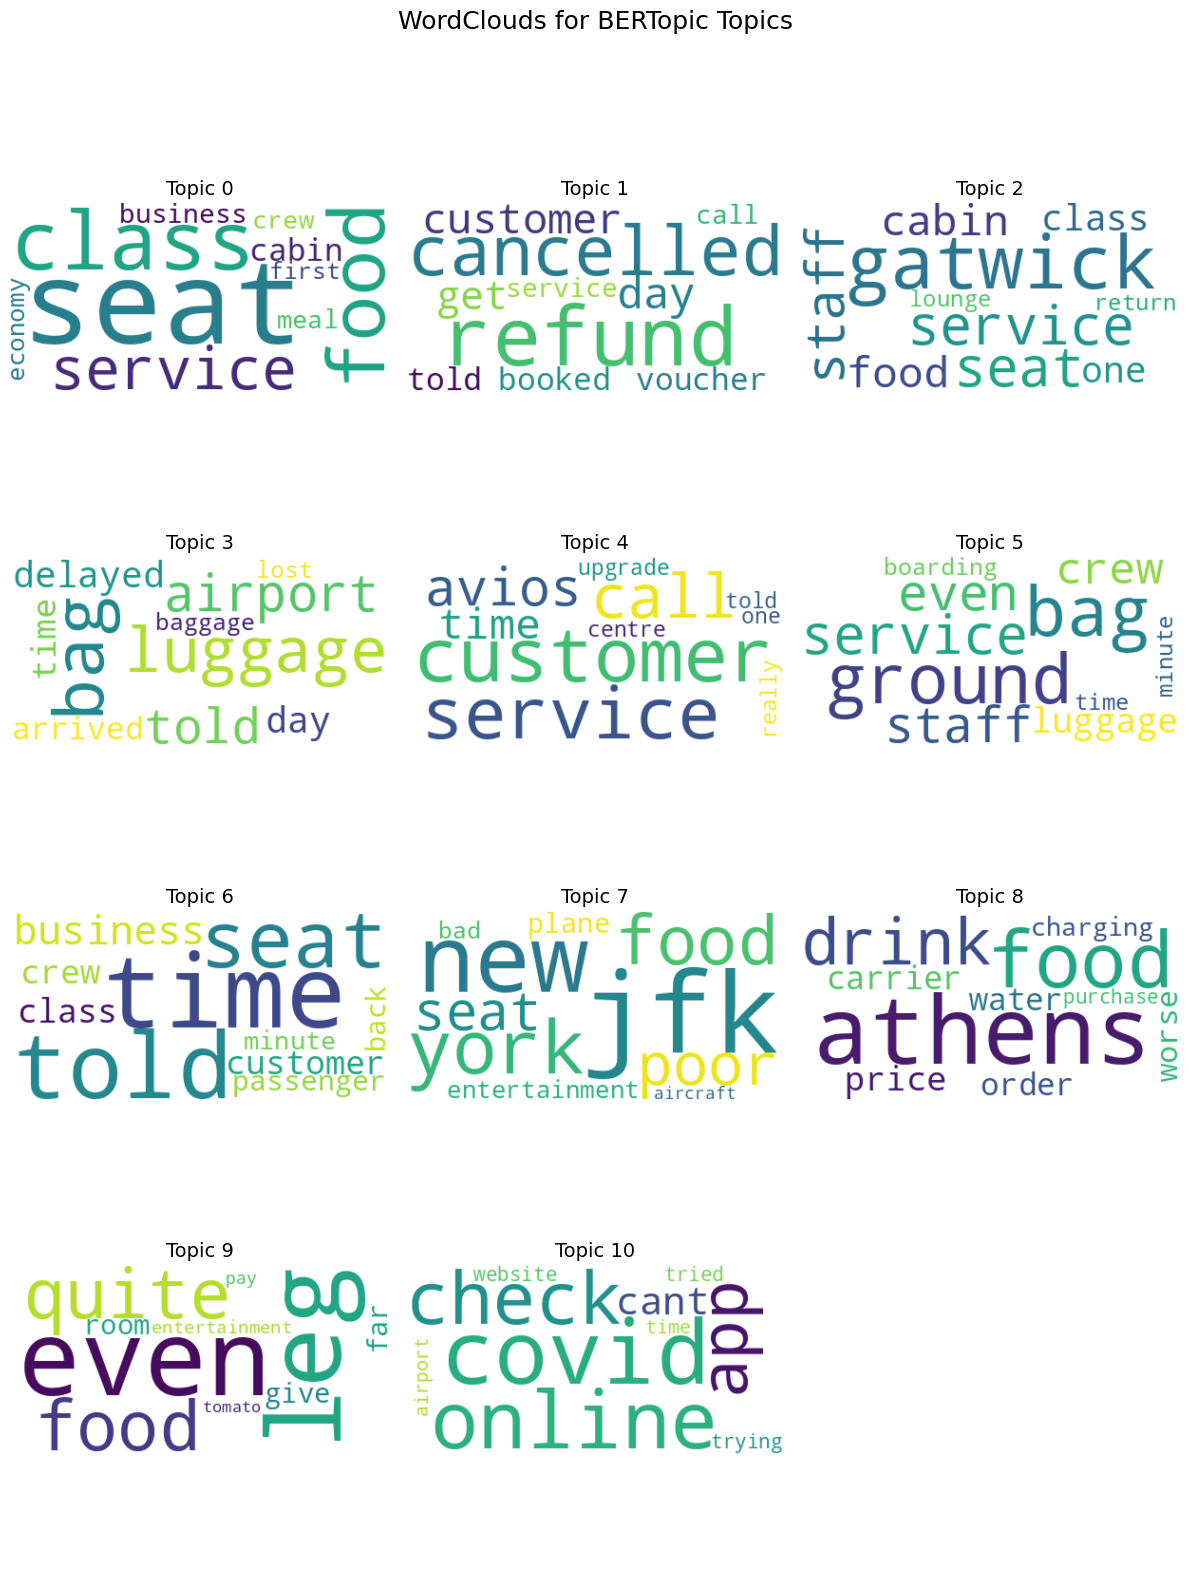

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_topic_wordclouds(topic_model, num_words=15, cols=3):
    """
    Generate and display word clouds for each BERTopic topic (excluding -1/outliers).

    :param topic_model: Fitted BERTopic instance
    :param num_words:   Number of top words per topic to include in the word cloud
    :param cols:        Number of columns in the subplot grid
    """
    # 1) Get valid topic IDs (exclude -1) from the model
    topics_info = topic_model.get_topic_info()
    topic_ids = topics_info[topics_info.Topic >= 0].Topic.tolist()

    # 2) Calculate grid size
    rows = (len(topic_ids) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows), squeeze=False)
    fig.suptitle("WordClouds for BERTopic Topics", fontsize=18)

    # 3) Loop through each valid topic
    for idx, topic_id in enumerate(topic_ids):
        words = topic_model.get_topic(topic_id)  # list of (word, weight)
        freqs = {word: weight for word, weight in words[:num_words]} if words else {}

        # Skip if empty
        if not freqs:
            continue

        wc = WordCloud(
            background_color='white',
            colormap='viridis'
        ).generate_from_frequencies(freqs)

        row, col = divmod(idx, cols)
        ax = axes[row][col]
        ax.imshow(wc, interpolation='bilinear')
        ax.set_title(f"Topic {topic_id}", fontsize=14)
        ax.axis('off')

    # 4) Turn off any unused subplots
    for j in range(len(topic_ids), rows * cols):
        r, c = divmod(j, cols)
        axes[r][c].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage:
plot_topic_wordclouds(topic_model, num_words=15, cols=3)


In [ ]:
import pandas as pd
from collections import Counter

# 1.define keywords for each category
category_keywords = {

    'Food and Beverage': [
        'food', 'bad', 'inedible', 'catering', 'tiny', 'bottle', 'water', 'snack', 'offered', 'poor', 'meal', 'service', 'goodies',
        'drinks', 'half', 'cup', 'tasteless', 'stale', 'snacks', 'quality', 'limited', 'options', 'ran', 'out', 'cold', 'bland', 'hungry',
        'unappetizing', 'expired', 'items', 'served', 'vegetarian', 'smell', 'provided', 'beverages', 'tray', 'dirty', 'portion',
        'size', 'small', 'dietary', 'needs', 'ignored', 'spoiled', 'burnt', 'eat', 'low', 'ingredients', 'really', 'refreshment',
        'choice', 'drink', 'snack', 'beverage', 'catering', 'coffee', 'breakfast', 'eggs', 'scrambled', 'beef', 'smashed', 'potatoes',
        'chocolate', 'bar', 'biscuits', 'basic'
    ],
    'Booking & Check-in Issues': [
        'check-in', 'problem', 'boarding', 'pass', 'error', 'reservation', 'ticket', 'valid', 'denied', 'booking', 'couldn’t',
        'online', 'confirmed', 'long', 'queue', 'assigned', 'confusing', 'process', 'system', 'glitch', 'website', 'kept', 'booked',
        'crashing', 'mobile', 'app', 'failed', 'name', 'mismatch', 'duplicate', 'wrong', 'travel', 'dates', 'status', 'agent', 'mistake',
        'counters', 'closed', 'early', 'printed', 'accepted', 'selection', 'checkin', 'confirmation', 'waiting', 'stand', 'deal', 'book',
        'another', 'refused', 'rebooking', 'online', 'standing', 'atrocious', 'Website', 'difficult', 'navigate', 'board', 'retraction',
        'chaos', 'reinstated', 'standby', 'allocated', 'allocation', 'slow', 'organised', 'Chaos', 'management', 'destination',
        'struggling', 'communication', 'email', 'overcrowded', 'crashed', 'computer', 'crowd', 'procedure', 'queue', 'disorganised',
        'impatient', 'crowded', 'replacement', 'electronically', 'unavailable', 'unavailability', 'unusable', 'desk'
    ],
    'Seating Comfort': [
        'tight', 'legroom', 'seat', 'uncomfortable', 'seats', 'cramped', 'poor', 'design', 'reclining', 'doesn’t', 'recline', 'room',
        'legs', 'broken', 'wouldn’t', 'recline', 'area', 'old', 'worn', 'crowded', 'cabin', 'configuration', 'armrest', 'cushion', 'flat',
        'back', 'support', 'missing', 'aisle', 'exposed', 'tray', 'table', 'felt', 'seatbelt', 'tight', 'overhead', 'bin', 'above', 'match',
        'footrest', 'hard', 'sleep', 'movement', 'seating', 'recline', 'comfort', 'torn', 'cracked', 'jostling',
    ],
    'In-Flight Experience Issues': [
        'inflight', 'entertainment', 'broken', 'screen', 'WiFi', 'working', 'USB', 'port', 'seatback', 'failed', 'unavailable', 'headphones',
        'provided', 'flight', 'noisy', 'couldn’t', 'access', 'shop', 'system', 'loud', 'cabin', 'noise', 'unclean', 'restrooms', 'dirty',
        'lighting', 'bad', 'smell', 'annoying', 'addressed', 'temperature', 'boring', 'reading', 'materials',
        'air', 'conditioning', 'didn’t', 'work', 'dark', 'day', 'overhead', 'lights', 'respond', 'call', 'button', 'bed',
        'toilet', 'ran', 'supplies', 'felt', 'stuffy', 'announcements', 'window', 'shade', 'magazines', 'missing', 'blankets', 'pillows',
        'space', 'dirty', 'wifi', 'IFE', 'movie', 'movies', 'selection', 'noise', 'temperature', 'cabin', 'IFE', 'headphones',
        'pillow', 'blanket', 'attention', 'attendant', 'AC', 'disturb', 'crying', 'baby', 'shouting', 'facility', 'medium', 'poor', 'charge',
        'point', 'welcome', 'package', 'disrupt', 'disrupted', 'overhead', 'cabin', 'power', 'supply', 'table', 'aisle', 'grabbing', 'tracker',
        'failure', 'joke', 'condition', 'electronics', 'functional', 'blocking', 'coach', 'place', 'comfortably', 'store', 'item', 'holder',
        'entire', 'control', 'size', 'position', 'haul', 'trip', 'touch', 'charger', 'magazine', 'shop', 'old', 'plane', 'filthy', 'brush',
        'tooth brush', 'earplugs', 'socks', 'disposable'
    ],
    'Baggage Problems': [
        'lost', 'luggage', 'baggage', 'arrived', 'got', 'bag', 'mishandled', 'information', 'hand', 'taken', 'missing', 'Missing', 'suitcase',
        'unclear', 'damaged', 'mishandled', 'bags', 'extra', 'charge', 'tampered', 'claim', 'took', 'long', 'items', 'tags', 'Bags',
        'opened', 'transit', 'received', 'someone', 'else', 'arrived', 'next', 'day', 'tracking', 'available', 'report', 'airport', 'Lost',
        'line', 'chaotic', 'refused', 'help', 'handle', 'broken', 'denied', 'carry', 'cabin', 'overhead', 'limits', 'avoid', 'waiting',
        'pay', 'hour', 'reclaim', 'claim', 'delay', 'personal', 'belonging', 'checked', 'little', 'effort', 'wife', 'reclaim', 'airtags',
        'carryon', 'mistagged', 'tag', 'tags', 'promised', 'discovered', 'destroyed', 'figure', 'handling', 'left', 'behind', 'locate',
        'wheel', 'reported', 'showed', 'trolley', 'mislabelled', 'clothes', 'jewellery', 'Luggage', 'Baggage', 'reconcile', 'collect',
        'space', 'damaged', 'loaded', 'pram', 'stroller', 'counter', 'zip', 'carousel', 'priority'
    ],
    'Flight Delays & Cancellations': [
        'flight', 'delayed', 'missed', 'connection', 'cancelled', 'notice', 'delay', 'reason', 'rescheduled', 'stuck', 'plane', 'departure',
        'waited', 'hours', 'long', 'late', 'last-minute', 'left', 'poor', 'communication', 'connecting', 'multiple', 'alternate',
        'provided', 'weather', 'used', 'excuse', 'arrived', 'causing', 'communicated', 'work', 'tight', 'pilot', 'excuse', 'changedx',
        'tarmac', 'technical', 'fault', 'early', 'morning', 'hotel', 'minute', 'return', 'cancellation', 'Delayed', 'arrival', 'reschedule',
        'cancel', 'rescheduled', 'covid', 'covid19', 'excuse', 'wait', 'takeoff', 'holding', 'rebook', 'late', 'hour', 'departed', 'return',
        'miss', 'cancellation', 'expected', 'minute', 'canceled', 'replacement', 'arrived', 'Cancelled', 'connecting', 'explanation', 'inbound',
        'aircraft', 'zero', 'dismissive', 'rebooked', 'returned', 'technical', 'fault', 'original', 'estimated', 'extended', 'additional',
        'unexpectedly', 'unexpected', 'clearly', 'dismissive', 'unfortunately', 'notifying', 'schedule', 'scheduled', 'terrible', 'several',
        'morning', 'already', 'always', 'apologized', 'acceptable', 'cancel'
    ],
    'Refund & Compensation Disputes': [
        'refund', 'waiting', 'compensation', 'denied', 'insufficient', 'claim', 'rejected', 'asked', 'money', 'returned', 'penny', 'compensate',
        'reimbursement', 'issue', 'refused', 'pay', 'filed', 'received', 'policy', 'excessive', 'cancellation', 'fee', 'response', 'support',
        'delayed', 'ineligible', 'request', 'chase', 'weeks', 'misleading', 'terms', 'submission', 'worked', 'follow-up', 'airline', 'dispute',
        'explained', 'clearly', 'called', 'multiple', 'times', 'result', 'agent', 'eligible', 'reason', 'processing', 'deducted', 'partial',
        'only', 'reimburse', 'missed', 'connection', 'unfair', 'denial', 'automated', 'system', 'updates', 'refused', 'claimed', 'excuse',
        'reimbursed', 'offered', 'claimed', 'received', 'expense', 'penalty', 'followup', 'refunded', 'refundable', 'multiple', 'call', 'full',
        'partially', 'financial', 'cooling', 'possibility', 'rejection', 'alternative'
    ],
    'Loyalty Program and benefits': [
        'Avios', 'devalued', 'elite', 'member', 'upgraded', 'lounge', 'loyalty', 'recognition', 'membership', 'perks', 'lose', 'expect',
        'ignored', 'tier', 'status', 'upgrade', 'program', 'points', 'credited', 'recognized', 'benefits', 'confusing', 'reward', 'system',
        'expire', 'unfairly', 'downgraded', 'reason', 'frequent', 'flyer', 'support', 'useless', 'transparency', 'situation', 'privilege',
        'tiers', 'priority', 'access', 'earned', 'miles', 'vanished', 'partner', 'airline', 'honor', 'advertised', 'email', 'downgrade',
        'response', 'team', 'website', 'show', 'updated', 'difficult', 'redeem', 'rewards', 'account', 'blocked', 'number', 'accepted',
        'offer',  'avios', 'voucher', 'benefit', 'e-voucher', 'coupon', 'loyal', 'difference', 'business', 'class', 'economy', 'premium',
        'accountability', 'accommodation', 'discount', 'unfair', 'customer', 'room', 'efficiency', 'decency', 'shuttle', 'bus', 'companion',
        'message', 'opted', 'credit', 'credits', 'applying', 'future', 'change', 'hotline', 'sufficient', 'adjust', 'adjusting', 'flexible'
    ],
    'Overpriced & Poor Value for Money': [
        'worth', 'price', 'overpriced', 'ticket', 'expensive', 'service', 'ripoff', 'charged', 'more', 'value', 'money', 'quality', 'hidden',
        'fees', 'everywhere', 'rip-off', 'felt', 'cheated', 'low', 'fare', 'waste', 'business', 'class', 'economy',
        'downgrade', 'trap', 'charged', 'extra',  'included', 'high', 'costs', 'budget', 'forced', 'last', 'step', 'paid', 'competitors',
        'worse', 'scam', 'pricing', 'tactics', 'charge', 'cost', 'pound', 'euro'
    ],
    'Accessibility and special assistance': [
        'wheelchair', 'help', 'assistance', 'service', 'poor', 'denied', 'special', 'needed', 'disabled', 'access', 'boarding',
        'provided', 'ignored', 'lack', 'features', 'elderly', 'passengers', 'staff', 'untrained', 'needs', 'rude', 'support', 'inaccessible',
        'restroom', 'visual', 'announcements', 'escort', 'showed', 'rushed', 'despite', 'disability', 'request', 'system', 'empathy',
        'forced', 'walk', 'distance', 'priority', 'respected', 'desk', 'unmanned', 'heavy', 'mobility', 'gear', 'flagged', 'delivered',
        'wait', 'vehicle', 'accessibility', 'children', 'unable', 'chair', 'care', 'assist', 'disappointed', 'Denied', 'chairstroller',
        'distress', 'frustration', 'mobile', 'mobility', 'corridor', 'help', 'frustrated', 'nightmare', 'transportation'
    ],
    'Airline Staff & Ground Services': [
        'staff', 'rude', 'service', 'ground', 'crew', 'unhelpful', 'dismissive', 'help', 'desk', 'attitude', 'helpline', 'reply', 'bullying',
        'unprofessional', 'behavior', 'understaffed', 'callousness', 'ignored', 'complaints', 'disorganized', 'empathise', 'seemed', 'annoyed',
        'communication', 'elderly', 'laughed', 'complaint', 'agent', 'check', 'document', 'properly', 'customer care', 'misleading', 'frustrating',
        'repeated', 'requests', 'rushed', 'threatened', 'remove', 'helpdesk', 'hours', 'blamed', 'system', 'error', 'level', 'embarrassing',
        'worse', 'worst', 'nightmare', 'disgrace', 'get', 'nonexistent', 'staff', 'disrespect', 'respect', 'disappeared', 'laughing', 'rude',
        'attendant', 'employee', 'Staff', 'shortage', 'managed', 'poorly', 'unaware', 'mediocre', 'clueless', 'cleaning', 'unprofessional',
        'bother', 'callous', 'disregard', 'brunt', 'complaint', 'uncaring', 'trained', 'budge', 'argumentative', 'accusatory', 'mediocrity',
        'unsympathetic', 'solve', 'problem', 'cruelty', 'miserable', 'ugly', 'predicament', 'terrible', 'inattentive', 'appalled', 'appaling',
        'incompetent', 'untrustworthy', 'aggressive', 'obnoxious', 'impatient', 'flippant', 'disgusting', 'disappointing', 'abusive', 'arrogant',
        'unapologetic'
    ],
    'Safety & Security Concerns': [
        'unsafe', 'flight', 'safety', 'briefing', 'exit', 'row', 'concern', 'check', 'seatbelts', 'security', 'ignored', 'passenger',
        'aggressive', 'felt', 'equipment', 'faulty', 'seatbelt', 'broken', 'misconduct', 'cockpit', 'door', 'left', 'open',
        'emergency', 'exits', 'blocked', 'lights', 'work', 'pilot', 'announcement', 'unclear', 'dismissed', 'serious', 'behavior',
        'reported', 'cabin', 'takeoff', 'evacuation', 'procedure', 'shown', 'stand', 'landing', 'aircraft', 'maintained', 'officer',
        'absent', 'overhead', 'bin', 'popped', 'incident', 'turbulence', 'horrible', 'experience', 'abuse', 'indication',
        'carrier', 'slammed', 'stranded', 'foreign', 'engine', 'stress', 'heart', 'attack', 'risk', 'hernia', 'sign', 'stopped',
        'evacuated', 'knee', 'suffered', 'medical', 'contempt', 'ineptitude', 'insult', 'injury', 'turmoil', 'weed', 'panicked',
        'horror', 'grotty', 'trapped', 'horrendous', 'secure', 'asthma', 'disappointment', 'family', 'turbulent', 'insecurity',
        'mask', 'facial', 'stressful', 'protocol', 'social', 'safe', 'pandemic', 'threatened', 'awful', 'furious', 'frustrated'
    ]
}

# 2) Invert to word → category
word_to_category = {}
for cat, words in category_keywords.items():
    for w in words:
        word_to_category[w.lower()] = cat

# 3) Build topic_id → category map
topic_labels = {}
for tid in topic_model.get_topic_info().Topic:
    # get top words for this topic
    words = [w for w,_ in topic_model.get_topic(tid)]
    counts = Counter()
    for w in words:
        cat = word_to_category.get(w.lower())
        if cat:
            counts[cat] += 1
    # pick the most common—or default to "Unknown"
    topic_labels[tid] = counts.most_common(1)[0][0] if counts else "Unknown"

# 4) Function to map a review’s list of (topic,prob) → top‐k category labels
def get_topk_categories(topic_probs, topic_labels, k=5):
    topk = sorted(topic_probs, key=lambda x: x[1], reverse=True)[:k]
    # map each topic_id to its category label
    cats = [topic_labels.get(tid, "Unknown") for tid,_ in topk]
    # return unique, ordered
    return list(dict.fromkeys(cats))

# 5) Apply to your DataFrame
#    assume df['review_topics'] is a list of (topic_id,prob) for each review
df['assigned_categories'] = df['review_topics'].apply(
    lambda probs: get_topk_categories(probs, topic_labels, k=5)
)

# 6) Quick check
print(topic_labels)
print(df[['ReviewBody','assigned_categories']].head())


{-1: 'Airline Staff & Ground Services', 0: 'Overpriced & Poor Value for Money', 1: 'Refund & Compensation Disputes', 2: 'Airline Staff & Ground Services', 3: 'Baggage Problems', 4: 'Loyalty Program and benefits', 5: 'Airline Staff & Ground Services', 6: 'Seating Comfort', 7: 'In-Flight Experience Issues', 8: 'Food and Beverage', 9: 'Food and Beverage', 10: 'Booking & Check-in Issues'}
                                          ReviewBody  \
0  4 Hours takeoff received Mail stating cryptic ...   
1  I recently delay British Airways BRU LHR due s...   
2  5 day flight advised BA cancelled asked u rebo...   
3  We traveled Lisbon dream vacation cruise Portu...   
4  Booked flight Bucharest Manchester 2h 45 layov...   

                                 assigned_categories  
0  [Airline Staff & Ground Services, Overpriced &...  
1  [Airline Staff & Ground Services, Loyalty Prog...  
2  [Overpriced & Poor Value for Money, Airline St...  
3  [Airline Staff & Ground Services, Overpriced &...  


In [ ]:
#apply multi-label assignment
df['review_topics'] = df['review_topics'].apply(lambda x: get_topk_categories(x, topic_labels, k=5))


In [ ]:
df['review_topics']

0       [Airline Staff & Ground Services, Overpriced &...
1       [Airline Staff & Ground Services, Loyalty Prog...
2       [Overpriced & Poor Value for Money, Airline St...
3       [Airline Staff & Ground Services, Overpriced &...
4       [Airline Staff & Ground Services, Overpriced &...
                              ...                        
1097    [Airline Staff & Ground Services, Overpriced &...
1098    [Airline Staff & Ground Services, Overpriced &...
1099    [Airline Staff & Ground Services, Refund & Com...
1100    [Airline Staff & Ground Services, Seating Comf...
1101    [Overpriced & Poor Value for Money, Airline St...
Name: review_topics, Length: 1102, dtype: object

In [ ]:
#save results
df.to_csv('BA_Airline_NegativeReviews_with_BERTopic.csv', index=False)

In [ ]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# 1) Build a dictionary from your cleaned tokens
#    (you may already have one from your LDA setup)
dictionary = Dictionary(df1['tokens'])
dictionary.filter_extremes(no_below=5, no_above=0.5)

# 2) Extract the top words for each BERTopic cluster (excluding -1)
topic_info    = topic_model.get_topic_info()
valid_topics  = [t for t in topic_info.Topic.tolist() if t >= 0]
topics_words  = [
    [word for word, _ in topic_model.get_topic(topic_id)]
    for topic_id in valid_topics
]

# 3) Initialize CoherenceModel
coherence_model_bt = CoherenceModel(
    topics=topics_words,
    texts=df1['tokens'],        # list of token lists
    dictionary=dictionary,
    coherence='c_v'
)

# 4) Compute and print
coherence_bert = coherence_model_bt.get_coherence()
print(f"BERTopic Coherence (C_v): {coherence_bert:.4f}")


BERTopic Coherence (C_v): 0.4261


In [ ]:
# 1) Get the list of valid topic IDs (exclude the -1 noise cluster)
topic_info = topic_model.get_topic_info()
topic_ids  = [t for t in topic_info.Topic.tolist() if t >= 0]

# 2) Extract the top-n words for each BERTopic cluster
top_words = []
for tid in topic_ids:
    # topic_model.get_topic(tid) returns [(word, weight), …]
    words, _ = zip(*topic_model.get_topic(tid))   # unzip into two lists
    top_words.extend(words)                       # collect only the words

# 3) Compute diversity = (# unique words) / (total words)
unique_words   = set(top_words)
total_words    = len(top_words)
topic_diversity = len(unique_words) / total_words

print(f"BERTopic Topic Diversity: {topic_diversity:.4f}")


BERTopic Topic Diversity: 0.6727


In [ ]:
n = 15
top_words = []
for tid in topic_ids:
    words = [w for w,_ in topic_model.get_topic(tid)][:n]
    top_words.extend(words)

unique_words    = set(top_words)
total_words     = len(top_words)
topic_diversity = len(unique_words) / total_words
print(f"Diversity (top {n} words/topic): {topic_diversity:.4f}")


Diversity (top 15 words/topic): 0.6727


In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from hdbscan import HDBSCAN
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_diversity_bertopic(
    texts,              # List[str], your cleaned documents
    tokens,             # List[List[str]], tokenized docs for coherence
    dictionary,         # Gensim Dictionary built on tokens
    start=5, limit=21, step=1,
    topn_words=15
):
    coherence_scores = []
    diversity_scores  = []
    topic_range       = range(start, limit, step)

    # Prepare your vectorizer / UMAP / clustering once
    vectorizer = CountVectorizer(stop_words=list(all_stopwords), min_df=5)
    umap_model = UMAP(
        n_components=2,
        n_neighbors=15,
        min_dist=0.0,
        metric="cosine",
        random_state=42
    )
    # You can either use HDBSCAN or KMeans here
    cluster_model = HDBSCAN(
        min_cluster_size=2,
        metric="euclidean",
        cluster_selection_method="eom",
        prediction_data=True
    )

    for n_topics in topic_range:
        # 1) Instantiate & fit
        topic_model = BERTopic(
            nr_topics=n_topics,
            vectorizer_model=vectorizer,
            umap_model=umap_model,
            hdbscan_model=cluster_model,
            calculate_probabilities=False   # we don’t need per‑doc probs here
        )
        _, _ = topic_model.fit_transform(texts)

        # 2) Extract top‐words per topic (exclude -1)
        info         = topic_model.get_topic_info()
        valid_tids   = [t for t in info.Topic.tolist() if t >= 0]
        topics_words = [
            [w for w,_ in topic_model.get_topic(tid)[:topn_words]]
            for tid in valid_tids
        ]

        # 3) Coherence
        cm = CoherenceModel(
            topics=topics_words,
            texts=tokens,
            dictionary=dictionary,
            coherence='c_v'
        )
        cohesion = cm.get_coherence()
        coherence_scores.append(cohesion)

        # 4) Diversity
        all_words = sum(topics_words, [])
        diversity = len(set(all_words)) / len(all_words) if all_words else 0
        diversity_scores.append(diversity)

        print(f"Topics={n_topics} → Coherence={cohesion:.4f}, Diversity={diversity:.4f}")

    return topic_range, coherence_scores, diversity_scores



In [ ]:
# 1) Build your Gensim dictionary & preprocess once:
from gensim.corpora import Dictionary
dictionary = Dictionary(df1['tokens'])
dictionary.filter_extremes(no_below=5, no_above=0.5)

# 2) Call the function
texts = df1['processed'].tolist()   # your cleaned joined strings
tokens = df1['tokens'].tolist()     # your token lists

topic_range, coh_scores, div_scores = compute_coherence_diversity_bertopic(
    texts, tokens, dictionary,
    start=5, limit=21, step=1, topn_words=15
)


Topics=5 → Coherence=0.4857, Diversity=0.1000
Topics=6 → Coherence=0.4300, Diversity=0.2000
Topics=7 → Coherence=0.3692, Diversity=0.4000
Topics=8 → Coherence=0.3634, Diversity=0.7857
Topics=9 → Coherence=0.3832, Diversity=0.7875
Topics=10 → Coherence=0.3844, Diversity=0.8000
Topics=11 → Coherence=0.3842, Diversity=0.8100
Topics=12 → Coherence=0.4054, Diversity=0.8000
Topics=13 → Coherence=0.4164, Diversity=0.7667
Topics=14 → Coherence=0.4075, Diversity=0.7692
Topics=15 → Coherence=0.4014, Diversity=0.7357
Topics=16 → Coherence=0.4021, Diversity=0.7200
Topics=17 → Coherence=0.4105, Diversity=0.7063
Topics=18 → Coherence=0.4060, Diversity=0.7176
Topics=19 → Coherence=0.4112, Diversity=0.7222
Topics=20 → Coherence=0.4163, Diversity=0.7158


Topics=11 → Coherence=0.3842, Diversity=0.8100
Topics=12 → Coherence=0.4054, Diversity=0.8000
Topics=13 → Coherence=0.4164, Diversity=0.7667
Topics=14 → Coherence=0.4075, Diversity=0.7692


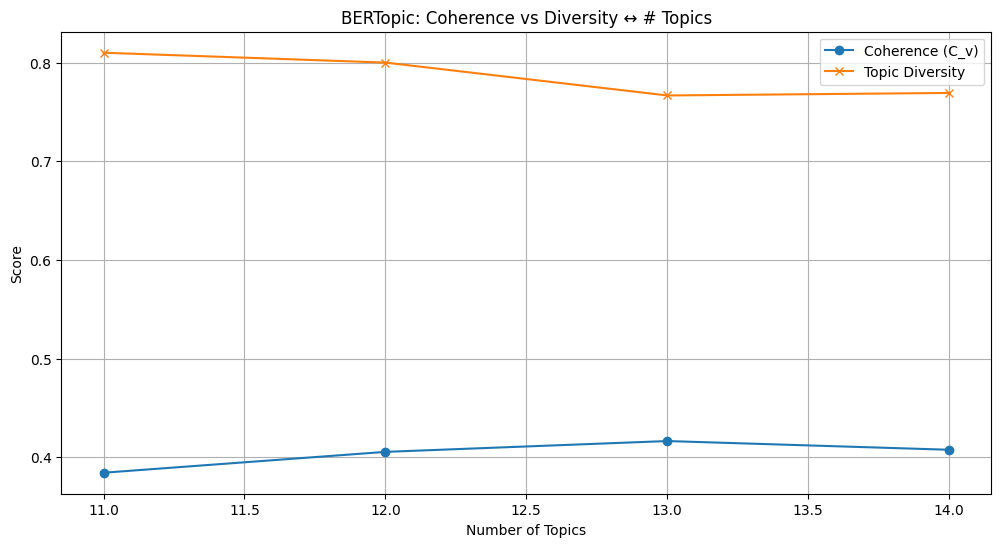

In [ ]:
import matplotlib.pyplot as plt
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from hdbscan import HDBSCAN
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

def compute_coherence_diversity_bertopic(
    texts,              # List[str]: your processed docs
    tokens,             # List[List[str]]: token lists for coherence
    dictionary,         # Gensim Dictionary built on tokens
    start=5, limit=21, step=1,
    topn_words=15
):
    coherence_scores = []
    diversity_scores  = []
    topic_range       = range(start, limit, step)

    # Build shared vectorizer/UMAP/HDBSCAN once
    vectorizer = CountVectorizer(stop_words=list(all_stopwords), min_df=5)
    umap_model = UMAP(n_components=2, n_neighbors=15, min_dist=0.0,
                      metric="cosine", random_state=42)
    cluster_model = HDBSCAN(min_cluster_size=2, metric="euclidean",
                            cluster_selection_method="eom", prediction_data=True)

    for n_topics in topic_range:
        # 1) Fit a fresh BERTopic with n_topics
        model = BERTopic(
            nr_topics=n_topics,
            vectorizer_model=vectorizer,
            umap_model=umap_model,
            hdbscan_model=cluster_model,
            calculate_probabilities=False
        )
        model.fit(texts)

        # 2) Extract top words per cluster (exclude -1)
        info      = model.get_topic_info()
        tids      = [t for t in info.Topic.tolist() if t >= 0]
        topics_w  = [ [w for w,_ in model.get_topic(t)[:topn_words]] for t in tids ]

        # 3) Compute coherence
        cm       = CoherenceModel(topics=topics_w,
                                  texts=tokens,
                                  dictionary=dictionary,
                                  coherence='c_v')
        coh      = cm.get_coherence()
        coherence_scores.append(coh)

        # 4) Compute diversity
        all_words   = sum(topics_w, [])
        diversity   = len(set(all_words)) / len(all_words) if all_words else 0
        diversity_scores.append(diversity)

        print(f"Topics={n_topics} → Coherence={coh:.4f}, Diversity={diversity:.4f}")

    return list(topic_range), coherence_scores, diversity_scores

# ——————————————
# Prepare inputs (once)
# ——————————————
# df1['processed'] is your cleaned, joined text
texts     = df1['processed'].tolist()
tokens    = df1['tokens'].tolist()
dictionary = Dictionary(tokens)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# ——————————————
# Compute & plot for e.g. 11–14 topics
# ——————————————
x, coh_vals, div_vals = compute_coherence_diversity_bertopic(
    texts, tokens, dictionary,
    start=11, limit=15, step=1, topn_words=15
)

plt.figure(figsize=(12, 6))
plt.plot(x, coh_vals, marker='o', label='Coherence (C_v)')
plt.plot(x, div_vals, marker='x', label='Topic Diversity')
plt.title('BERTopic: Coherence vs Diversity ↔ # Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


### You’ve now plotted two complementary metrics:

Coherence (C_v): how semantically consistent each topic is (higher → the top words in each topic actually “hang together” in your corpus).

Diversity: the proportion of unique words across all topic summaries (higher → your topics don’t keep re‑using the same words over and over).

#### Coherence rises from 11 → 13 topics (peaking at ~0.4164) then dips slightly at 14.

Diversity falls steadily as you add more topics (because with more topics, the same “power” words tend to re‑appear, so the ratio of unique words to total words drops).



### Is this “good”?
A C_v ≈ 0.4 is quite reasonable for user‑review data (these tend to be noisier than, say, academic abstracts).

A diversity ≥ 0.75 means your topic labels remain fairly distinct—up at 11 topics you hit 0.81, and even at 12 you’re at a solid 0.80.

### Picking the sweet spot
Because you ultimately want exactly 12 topics (to match your 12 manual categories), and because:

12 topics gives you Coherence = 0.4054 (only slightly below the 13‑topic peak),

12 topics also still keeps Diversity = 0.8000,

that looks like your best trade‑off point. It means your topics will be coherent enough (C_v ≈ 0.41) without sacrificing distinctness, and it aligns perfectly with your 12 ground‑truth classes.

In short:

Yes, these scores are in the ballpark for consumer reviews.

12 topics is a natural choice here, since it maximizes your alignment to manual categories while keeping both coherence and diversity high

### Only Bertopic results

In [ ]:
# ──────────────────────────────────────────────────────────
# 1) Imports & Setup
# ──────────────────────────────────────────────────────────
import re, json, pandas as pd
from collections import Counter

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# ──────────────────────────────────────────────────────────
# 2) Load & Preprocess
# ──────────────────────────────────────────────────────────
df = pd.read_csv("BA_Airline_NegativeReviews_Half.csv")
df['tokens'] = df['ReviewBody'].str.lower().str.findall(r'\w+')

import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
custom = {'u', 'us', 'could', 'would', 'ba', 'british', 'airways', 'airline', 'and','BA','Ba','British','Airways','heathrow','london'}
stopset = set(stopwords.words('english')).union(custom)

df['processed'] = df['tokens'].apply(
    lambda toks: " ".join([t for t in toks if t not in stopset and not t.isdigit()])
)
docs = df['processed'].tolist()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# ──────────────────────────────────────────────────────────
# 3) Fit BERTopic + KMeans (12 clusters, no –1)
# ──────────────────────────────────────────────────────────
vectorizer = CountVectorizer(stop_words=list(stopset), min_df=5)
umap_model  = UMAP(n_components=2, n_neighbors=15, min_dist=0.0,
                   metric="cosine", random_state=42)
kmeans      = KMeans(n_clusters=12, random_state=42)

topic_model = BERTopic(
    hdbscan_model=kmeans,                 # remove –1 noise
    umap_model=umap_model,
    vectorizer_model=vectorizer,
    calculate_probabilities=True
)




# ──────────────────────────────────────────────────────────
# 3) Fit BERTopic + KMeans (12 clusters, no –1)
# ──────────────────────────────────────────────────────────
topics, _ = topic_model.fit_transform(docs)     # probs is None here under KMeans

# ──────────────────────────────────────────────────────────
# 4) Approximate full topic‑probability matrix
# ──────────────────────────────────────────────────────────
probs = topic_model.approximate_distribution(docs)
# now `probs` is a NumPy array of shape (n_docs, 12)




In [ ]:
# ──────────────────────────────────────────────────────────
# 4) Semantic Mapping: topic IDs → your 12 categories
# ──────────────────────────────────────────────────────────
categories = [
  "Food and Beverage","Booking & Check-in Issues","Seating Comfort",
  "In-Flight Experience Issues","Baggage Problems","Safety & Security Concerns",
  "Flight Delays & Cancellations","Refund & Compensation Disputes",
  "Loyalty Program and benefits",
  "Overpriced & Poor Value for Money",
  "Accessibility and special assistance",
  "Airline Staff & Ground Services"
]

embedder = SentenceTransformer("all-MiniLM-L6-v2")
cat_embs  = embedder.encode(categories, normalize_embeddings=True)

topic2class = {}
topic_ids = topic_model.get_topic_info().Topic.tolist()
for tid in topic_ids:
    words = [w for w,_ in topic_model.get_topic(tid)][:10]
    emb   = embedder.encode(" ".join(words), normalize_embeddings=True)
    sim   = cosine_similarity([emb], cat_embs)[0]
    topic2class[tid] = categories[sim.argmax()]


In [ ]:
# ──────────────────────────────────────────────────────────
# 3) Fit BERTopic backed by KMeans → topics only, probs=None
# ──────────────────────────────────────────────────────────
topics, _ = topic_model.fit_transform(docs)
#  (Under KMeans, probs is always None here)

# ──────────────────────────────────────────────────────────
# 4) Approximate the full topic‐probability matrix
# ──────────────────────────────────────────────────────────
probs, _ = topic_model.approximate_distribution(
    docs,
    use_embedding_model=False  # default; no need for token‐level breakdown
)
# Now `probs` is a NumPy array shape (n_docs, 12)

# ──────────────────────────────────────────────────────────
# 5) Multi‑Label Prediction: up to 5 labels per doc above threshold
# ──────────────────────────────────────────────────────────
def predict_multi_labels(probs_row, topk=5, min_prob=0.02):
    """
    Given a 1D array of topic probabilities, return up to `topk`
    category labels whose probability ≥ min_prob. If none, returns [].
    """
    idxs = probs_row.argsort()[::-1]        # highest→lowest
    preds = []
    for i in idxs[:topk]:
        if probs_row[i] < min_prob:
            continue                         # skip low‐confidence topics
        cls = topic2class[topic_ids[i]]
        if cls not in preds:
            preds.append(cls)
    return preds

df['predicted_classes'] = [
    predict_multi_labels(p, topk=5, min_prob=0.02)
    for p in probs
]


In [ ]:
from collections import Counter
import pandas as pd

# Explode the list of predicted classes into one row per tag
exploded = df.explode('predicted_classes')

# Count occurrences of each category
tag_counts = exploded['predicted_classes'].value_counts().rename_axis('Category').reset_index(name='Count')

# (Optional) ensure all categories appear, even if zero
all_cats = pd.DataFrame({'Category': categories})
tag_counts = all_cats.merge(tag_counts, on='Category', how='left').fillna(0).astype({'Count': int})

print(tag_counts)


                                Category  Count
0                      Food and Beverage    470
1              Booking & Check-in Issues      0
2                        Seating Comfort      0
3            In-Flight Experience Issues      0
4                       Baggage Problems    384
5             Safety & Security Concerns      0
6          Flight Delays & Cancellations    601
7         Refund & Compensation Disputes      0
8           Loyalty Program and benefits      0
9      Overpriced & Poor Value for Money      0
10  Accessibility and special assistance      0
11       Airline Staff & Ground Services   1099


In [ ]:
# ──────────────────────────────────────────────────────────
# 6) Load Manual JSON & Build Ground‑Truth Multi‑Labels
# ──────────────────────────────────────────────────────────
with open("BA_Airline_LabelStudio_Annotations.json","r") as f:
    manual = json.load(f)

ls = []
for rec in manual:
    txt    = rec["data"]["ReviewBody"]
    labels = [r["value"]["labels"][0] for r in rec["annotations"][0]["result"]]
    ls.append({"ReviewBody": txt, "manual_labels": labels})
ls_df = pd.DataFrame(ls)


In [ ]:








# ──────────────────────────────────────────────────────────
# 7) Merge Predictions & Ground‑Truth
# ──────────────────────────────────────────────────────────
merged = pd.merge(ls_df,
                  df[["ReviewBody","predicted_classes"]],
                  on="ReviewBody", how="inner")

# ──────────────────────────────────────────────────────────
# 8) Compute TP, FP, FN per category
# ──────────────────────────────────────────────────────────
counts = {c: Counter() for c in categories}
for _, row in merged.iterrows():
    T = set(row["manual_labels"])
    P = set(row["predicted_classes"])
    for c in categories:
        if c in T and c in P: counts[c]["TP"] += 1
        if c not in T and c in P: counts[c]["FP"] += 1
        if c in T and c not in P: counts[c]["FN"] += 1

# ──────────────────────────────────────────────────────────
# 9) Compute & Display Precision, Recall, F1, Support
# ──────────────────────────────────────────────────────────
reports = []
for c in categories:
    TP = counts[c]["TP"]; FP = counts[c]["FP"]; FN = counts[c]["FN"]
    P  = TP/(TP+FP) if TP+FP>0 else 0
    R  = TP/(TP+FN) if TP+FN>0 else 0
    F1 = 2*P*R/(P+R) if P+R>0 else 0
    reports.append({
      "Category": c, "Precision": round(P,4),
      "Recall": round(R,4), "F1-Score": round(F1,4),
      "Support": TP+FN
    })

print(pd.DataFrame(reports).set_index("Category"))


                                      Precision  Recall  F1-Score  Support
Category                                                                  
Food and Beverage                        0.6149  0.6613    0.6373      437
Booking & Check-in Issues                0.0000  0.0000    0.0000      155
Seating Comfort                          0.0000  0.0000    0.0000      271
In-Flight Experience Issues              0.0000  0.0000    0.0000      423
Baggage Problems                         0.2924  0.7568    0.4218      148
Safety & Security Concerns               0.0000  0.0000    0.0000       62
Flight Delays & Cancellations            0.4800  0.9057    0.6275      318
Refund & Compensation Disputes           0.0000  0.0000    0.0000      152
Loyalty Program and benefits             0.0000  0.0000    0.0000       81
Overpriced & Poor Value for Money        0.0000  0.0000    0.0000      199
Accessibility and special assistance     0.0000  0.0000    0.0000       32
Airline Staff & Ground Se

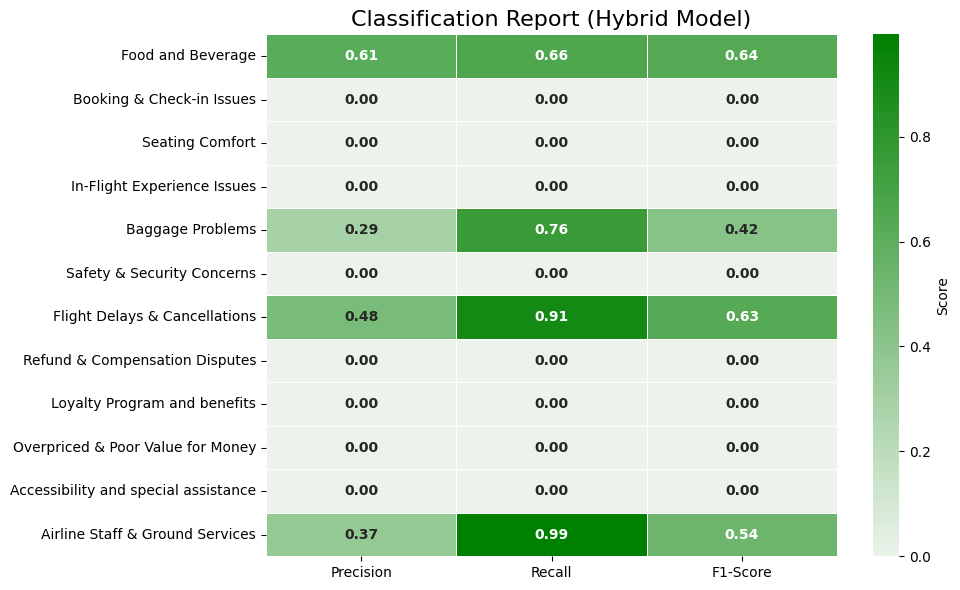

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suppose you already have:
# reports = [ { "Category": c, "Precision": P, "Recall": R, "F1-Score": F1, "Support": S } for ... ]
# So:
df_report = pd.DataFrame(reports).set_index("Category")

# Now plot precision, recall, f1-score as a green heatmap:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_report[["Precision", "Recall", "F1-Score"]],
    annot=True,
    fmt=".2f",
    cmap=sns.light_palette("green", as_cmap=True),
    cbar_kws={"label": "Score"},
    linewidths=0.5,
    linecolor="white",
    annot_kws={"weight": "bold"}
)
plt.title("Classification Report (Hybrid Model)", fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.show()


## 2. Seeded/guided topic modeling

In [ ]:
# 0) Install & Imports
!pip install bertopic[flair] umap-learn hdbscan sentence-transformers

from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
import pandas as pd

# 1) Load your negative‑review CSV
df = pd.read_csv("BA_Airline_NegativeReviews_Half.csv")
docs = df["ReviewBody"].tolist()

# 2) Define seed words per category
seed_words = {
    'Food and Beverage': [
        'food', 'bad', 'inedible', 'catering', 'tiny', 'bottle', 'water', 'snack', 'offered', 'poor', 'meal',
        'drinks', 'half', 'cup', 'tasteless', 'stale', 'snacks', 'quality', 'limited', 'options', 'ran', 'out', 'cold', 'bland', 'hungry',
        'unappetizing', 'expired', 'items', 'served', 'vegetarian', 'smell', 'provided', 'beverages', 'tray', 'dirty', 'portion',
        'size', 'small', 'dietary', 'needs', 'ignored', 'spoiled', 'burnt', 'eat', 'low', 'ingredients', 'refreshment',
        'choice', 'drink', 'snack', 'beverage', 'catering', 'coffee', 'breakfast', 'eggs', 'scrambled', 'beef', 'smashed', 'potatoes',
        'chocolate', 'bar', 'biscuits', 'basic'
    ],# :contentReference[oaicite:0]{index=0}
     'Booking & Check-in Issues': [
        'check-in', 'problem', 'boarding', 'pass', 'error', 'reservation', 'ticket', 'valid', 'denied', 'booking', 'couldn’t',
        'online', 'confirmed', 'long', 'queue', 'assigned', 'confusing', 'process', 'system', 'glitch', 'website', 'kept', 'booked',
        'crashing', 'mobile', 'app', 'failed', 'name', 'mismatch', 'duplicate', 'wrong', 'travel', 'dates', 'status', 'agent', 'mistake',
        'counters', 'closed', 'early', 'printed', 'accepted', 'selection', 'checkin', 'confirmation', 'waiting', 'stand', 'deal', 'book',
        'another', 'refused', 'rebooking', 'online', 'standing', 'atrocious', 'Website', 'difficult', 'navigate', 'board', 'retraction',
        'chaos', 'reinstated', 'standby', 'allocated', 'allocation', 'slow', 'organised', 'Chaos', 'management', 'destination',
        'struggling', 'communication', 'email', 'overcrowded', 'crashed', 'computer', 'crowd', 'procedure', 'queue', 'disorganised',
        'impatient', 'crowded', 'replacement', 'electronically', 'unavailable', 'unavailability', 'unusable', 'desk'
    ],# :contentReference[oaicite:1]{index=1}
     'Seating Comfort': [
        'tight', 'legroom', 'seat', 'uncomfortable', 'seats', 'cramped', 'poor', 'design', 'reclining', 'doesn’t', 'recline', 'room',
        'legs', 'broken', 'wouldn’t', 'recline', 'area', 'old', 'worn', 'crowded', 'cabin', 'configuration', 'armrest', 'cushion', 'flat',
        'back', 'support', 'missing', 'aisle', 'exposed', 'tray', 'table', 'felt', 'seatbelt', 'tight', 'overhead', 'bin', 'above', 'match',
        'footrest', 'hard', 'sleep', 'movement', 'seating', 'recline', 'comfort', 'torn', 'cracked', 'jostling',
    ],# :contentReference[oaicite:2]{index=2}
        'In-Flight Experience Issues': [
        'inflight', 'entertainment', 'broken', 'screen', 'WiFi', 'working', 'USB', 'port', 'seatback', 'failed', 'unavailable', 'headphones',
        'provided', 'flight', 'noisy', 'couldn’t', 'access', 'shop', 'system', 'loud', 'cabin', 'noise', 'unclean', 'restrooms', 'dirty',
        'lighting', 'bad', 'smell', 'annoying', 'addressed', 'temperature', 'boring', 'reading', 'materials',
        'air', 'conditioning', 'didn’t', 'work', 'dark', 'day', 'overhead', 'lights', 'respond', 'call', 'button', 'bed',
        'toilet', 'ran', 'supplies', 'felt', 'stuffy', 'announcements', 'window', 'shade', 'magazines', 'missing', 'blankets', 'pillows',
        'space', 'dirty', 'wifi', 'IFE', 'movie', 'movies', 'selection', 'noise', 'temperature', 'cabin', 'IFE', 'headphones',
        'pillow', 'blanket', 'attention', 'attendant', 'AC', 'disturb', 'crying', 'baby', 'shouting', 'facility', 'medium', 'poor', 'charge',
        'point', 'welcome', 'package', 'disrupt', 'disrupted', 'overhead', 'cabin', 'power', 'supply', 'table', 'aisle', 'grabbing', 'tracker',
        'failure', 'joke', 'condition', 'electronics', 'functional', 'blocking', 'coach', 'place', 'comfortably', 'store', 'item', 'holder',
        'entire', 'control', 'size', 'position', 'haul', 'trip', 'touch', 'charger', 'magazine', 'shop', 'old', 'plane', 'filthy', 'brush',
        'tooth brush', 'earplugs', 'socks', 'disposable', 'wifi'
    ],# :contentReference[oaicite:3]{index=3}
        'Baggage Problems': [
        'lost', 'luggage', 'baggage', 'arrived', 'got', 'bag', 'mishandled', 'information', 'hand', 'taken', 'missing', 'Missing', 'suitcase',
        'unclear', 'damaged', 'mishandled', 'bags', 'extra', 'charge', 'tampered', 'claim', 'took', 'long', 'items', 'tags', 'Bags',
        'opened', 'transit', 'received', 'someone', 'else', 'arrived', 'next', 'day', 'tracking', 'available', 'report', 'airport', 'Lost',
        'line', 'chaotic', 'refused', 'help', 'handle', 'broken', 'denied', 'carry', 'cabin', 'overhead', 'limits', 'avoid', 'waiting',
        'pay', 'hour', 'reclaim', 'claim', 'delay', 'personal', 'belonging', 'checked', 'little', 'effort', 'wife', 'reclaim', 'airtags',
        'carryon', 'mistagged', 'tag', 'tags', 'promised', 'discovered', 'destroyed', 'figure', 'handling', 'left', 'behind', 'locate',
        'wheel', 'reported', 'showed', 'trolley', 'mislabelled', 'clothes', 'jewellery', 'Luggage', 'Baggage', 'reconcile', 'collect',
        'space', 'damaged', 'loaded', 'pram', 'stroller', 'counter', 'zip', 'carousel', 'priority'
    ],# :contentReference[oaicite:4]{index=4}
    'Safety & Security Concerns': [
        'unsafe', 'flight', 'safety', 'briefing', 'exit', 'row', 'concern', 'check', 'seatbelts', 'security', 'ignored', 'passenger',
        'aggressive', 'felt', 'equipment', 'faulty', 'seatbelt', 'broken', 'misconduct', 'cockpit', 'door', 'left', 'open',
        'emergency', 'exits', 'blocked', 'lights', 'work', 'pilot', 'announcement', 'unclear', 'dismissed', 'serious', 'behavior',
        'reported', 'cabin', 'takeoff', 'evacuation', 'procedure', 'shown', 'stand', 'landing', 'aircraft', 'maintained', 'officer',
        'absent', 'overhead', 'bin', 'popped', 'incident', 'turbulence', 'horrible', 'experience', 'abuse', 'indication',
        'carrier', 'slammed', 'stranded', 'foreign', 'engine', 'stress', 'heart', 'attack', 'risk', 'hernia', 'sign', 'stopped',
        'evacuated', 'knee', 'suffered', 'medical', 'contempt', 'ineptitude', 'insult', 'injury', 'turmoil', 'weed', 'panicked',
        'horror', 'grotty', 'trapped', 'horrendous', 'secure', 'asthma', 'disappointment', 'family', 'turbulent', 'insecurity',
        'mask', 'facial', 'stressful', 'protocol', 'social', 'safe', 'pandemic', 'threatened', 'awful', 'furious', 'frustrated'
    ],# :contentReference[oaicite:5]{index=5}
     'Flight Delays & Cancellations': [
        'flight', 'delayed', 'missed', 'connection', 'cancelled', 'notice', 'delay', 'reason', 'rescheduled', 'stuck', 'plane', 'departure',
        'waited', 'hours', 'long', 'late', 'last-minute', 'left', 'poor', 'communication', 'connecting', 'multiple', 'alternate',
        'provided', 'weather', 'used', 'excuse', 'arrived', 'causing', 'communicated', 'work', 'tight', 'pilot', 'excuse', 'changedx',
        'tarmac', 'technical', 'fault', 'early', 'morning', 'hotel', 'minute', 'return', 'cancellation', 'Delayed', 'arrival', 'reschedule',
        'cancel', 'rescheduled', 'covid', 'covid19', 'excuse', 'wait', 'takeoff', 'holding', 'rebook', 'late', 'hour', 'departed', 'return',
        'miss', 'cancellation', 'expected', 'minute', 'canceled', 'replacement', 'arrived', 'Cancelled', 'connecting', 'explanation', 'inbound',
        'aircraft', 'zero', 'dismissive', 'rebooked', 'returned', 'technical', 'fault', 'original', 'estimated', 'extended', 'additional',
        'unexpectedly', 'unexpected', 'clearly', 'dismissive', 'unfortunately', 'notifying', 'schedule', 'scheduled', 'terrible', 'several',
        'morning', 'already', 'always', 'apologized', 'acceptable', 'cancel'
    ],# :contentReference[oaicite:6]{index=6}
     'Refund & Compensation Disputes': [
        'refund', 'waiting', 'compensation', 'denied', 'insufficient', 'claim', 'rejected', 'asked', 'money', 'returned', 'penny', 'compensate',
        'reimbursement', 'issue', 'refused', 'pay', 'filed', 'received', 'policy', 'excessive', 'cancellation', 'fee', 'response', 'support',
        'delayed', 'ineligible', 'request', 'chase', 'weeks', 'misleading', 'terms', 'submission', 'worked', 'follow-up', 'airline', 'dispute',
        'explained', 'clearly', 'called', 'multiple', 'times', 'result', 'agent', 'eligible', 'reason', 'processing', 'deducted', 'partial',
        'only', 'reimburse', 'missed', 'connection', 'unfair', 'denial', 'automated', 'system', 'updates', 'refused', 'claimed', 'excuse',
        'reimbursed', 'offered', 'claimed', 'received', 'expense', 'penalty', 'followup', 'refunded', 'refundable', 'multiple', 'call', 'full',
        'partially', 'financial', 'cooling', 'possibility', 'rejection', 'alternative','voucher'
    ],# :contentReference[oaicite:7]{index=7}
    'Loyalty Program and benefits': [
        'Avios', 'devalued', 'elite', 'member', 'upgraded', 'lounge', 'loyalty', 'recognition', 'membership', 'perks', 'lose', 'expect',
        'ignored', 'tier', 'status', 'upgrade', 'program', 'points', 'credited', 'recognized', 'benefits', 'confusing', 'reward', 'system',
        'expire', 'unfairly', 'downgraded', 'reason', 'frequent', 'flyer', 'support', 'useless', 'transparency', 'loyalty', 'privilege',
        'tiers', 'priority', 'access', 'earned', 'miles', 'vanished', 'partner', 'airline', 'honor', 'advertised', 'email', 'downgrade',
        'response', 'team', 'website', 'show', 'updated', 'difficult', 'redeem', 'rewards', 'account', 'blocked', 'number', 'membership',
        'offer',  'avios', 'voucher', 'benefit', 'e-voucher', 'coupon', 'loyal', 'difference', 'business', 'class', 'economy', 'premium',
        'accountability', 'accommodation', 'discount', 'unfair', 'customer', 'room', 'efficiency', 'decency', 'shuttle', 'bus', 'companion',
        'message', 'opted', 'credit', 'credits', 'applying', 'future', 'change', 'hotline', 'sufficient', 'adjust', 'adjusting', 'flexible'
    ],# :contentReference[oaicite:8]{index=8}
    'Overpriced & Poor Value for Money': [
        'worth', 'price', 'overpriced', 'ticket', 'expensive', 'service', 'ripoff', 'charged', 'more', 'value', 'money', 'quality', 'hidden',
        'fees', 'everywhere', 'rip-off', 'felt', 'cheated', 'low', 'fare', 'waste', 'business', 'class', 'economy',
        'downgrade', 'trap', 'charged', 'extra',  'included', 'high', 'costs', 'budget', 'forced', 'last', 'step', 'paid', 'competitors',
        'worse', 'scam', 'pricing', 'tactics', 'charge', 'cost', 'pound', 'euro'
    ],# :contentReference[oaicite:9]{index=9}
    'Accessibility and special assistance': [
        'wheelchair', 'help', 'assistance', 'service', 'poor', 'denied', 'special', 'needed', 'disabled', 'access', 'boarding',
        'provided', 'ignored', 'lack', 'features', 'elderly', 'passengers', 'staff', 'untrained', 'needs', 'rude', 'support', 'inaccessible',
        'restroom', 'visual', 'announcements', 'escort', 'showed', 'rushed', 'despite', 'disability', 'request', 'system', 'empathy',
        'forced', 'walk', 'distance', 'priority', 'respected', 'desk', 'unmanned', 'heavy', 'mobility', 'gear', 'flagged', 'assist',
        'wait', 'vehicle', 'accessibility', 'children', 'unable', 'chair', 'care', 'assist', 'disappointed', 'Denied', 'chairstroller',
        'distress', 'frustration', 'mobile', 'mobility', 'corridor', 'help', 'frustrated', 'nightmare', 'transportation'
    ],# :contentReference[oaicite:10]{index=10}
     'Airline Staff & Ground Services': [
        'staff', 'rude', 'service', 'ground', 'crew', 'unhelpful', 'dismissive', 'help', 'desk', 'attitude', 'helpline', 'reply', 'bullying',
        'unprofessional', 'behavior', 'understaffed', 'callousness', 'ignored', 'complaints', 'disorganized', 'empathise', 'seemed', 'annoyed',
        'communication', 'elderly', 'laughed', 'complaint', 'agent', 'check', 'document', 'properly', 'customer care', 'misleading', 'frustrating',
        'repeated', 'requests', 'rushed', 'threatened', 'remove', 'helpdesk', 'hours', 'blamed', 'system', 'error', 'level', 'embarrassing',
        'worse', 'worst', 'nightmare', 'disgrace', 'get', 'nonexistent', 'staff', 'disrespect', 'respect', 'disappeared', 'laughing', 'rude',
        'attendant', 'employee', 'Staff', 'shortage', 'managed', 'poorly', 'unaware', 'mediocre', 'clueless', 'cleaning', 'unprofessional',
        'bother', 'callous', 'disregard', 'brunt', 'complaint', 'uncaring', 'trained', 'budge', 'argumentative', 'accusatory', 'mediocrity',
        'unsympathetic', 'solve', 'problem', 'cruelty', 'miserable', 'ugly', 'predicament', 'terrible', 'inattentive', 'appalled', 'appaling',
        'incompetent', 'untrustworthy', 'aggressive', 'obnoxious', 'impatient', 'flippant', 'disgusting', 'disappointing', 'abusive', 'arrogant',
        'unapologetic'
    ]# :contentReference[oaicite:11]{index=11}
}

# 3) Build the seeded c‑TF‑IDF transformer
ctfidf_model = ClassTfidfTransformer(
    seed_words    = sum(seed_words.values(), []),  # flatten all seeds into one list :contentReference[oaicite:12]{index=12}
    seed_multiplier = 2                            # boost those words by a factor of 2 :contentReference[oaicite:13]{index=13}
)

# 4) Create BERTopic with that transformer
vectorizer = CountVectorizer(stop_words="english", min_df=3)
umap_model = UMAP(n_neighbors=10, min_dist=0.0, metric="cosine", random_state=42)
topic_model = BERTopic(
    vectorizer_model = vectorizer,
    ctfidf_model     = ctfidf_model,
    umap_model       = umap_model,
    n_gram_range     = (1,2),
    calculate_probabilities=True
)

# 5) Fit & Transform
topics, probs = topic_model.fit_transform(docs)         # :contentReference[oaicite:14]{index=14}

# 6) Inspect your seeded topics
info = topic_model.get_topic_info().head(12)
print(info)

# 7) Show the top 10 words for each seeded topic
for cat, tid in zip(seed_words.keys(), info.Topic):
    words = [w for w,_ in topic_model.get_topic(tid)][:10]
    print(f"Category → {cat}")
    print("Top words:", words, "\n")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 134.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 9.8 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=0f0999729c98072fbc97e42dc75bb8b223f28ccee6dc20a00e3a80c65e0178c4
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


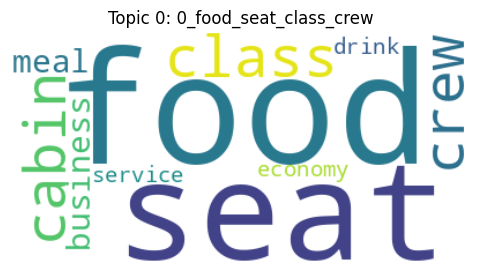

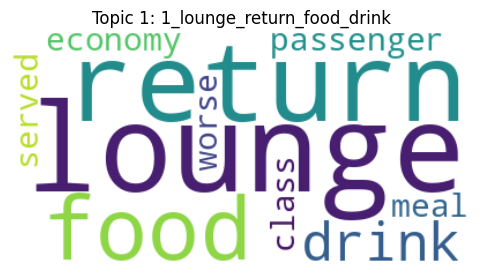

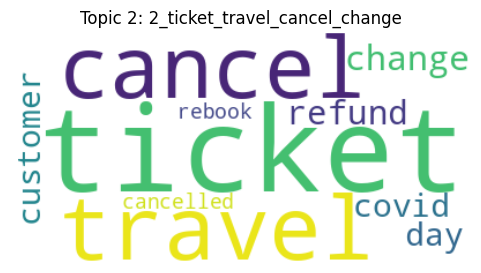

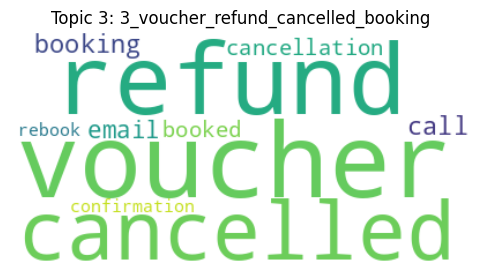

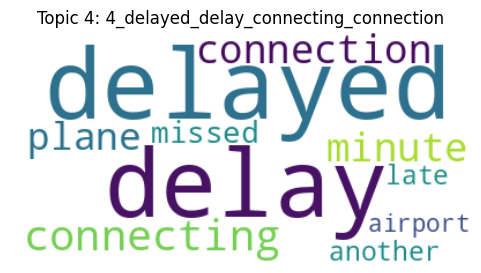

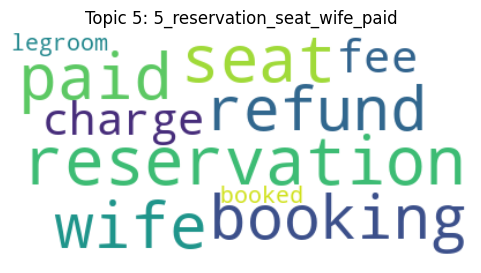

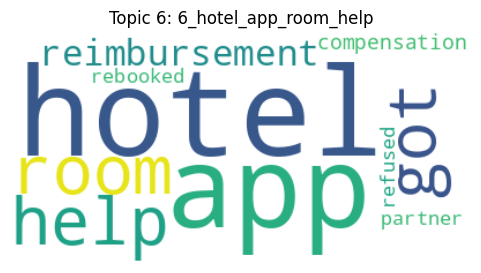

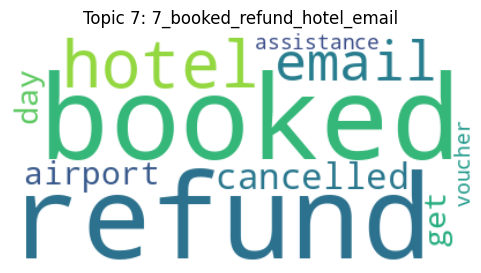

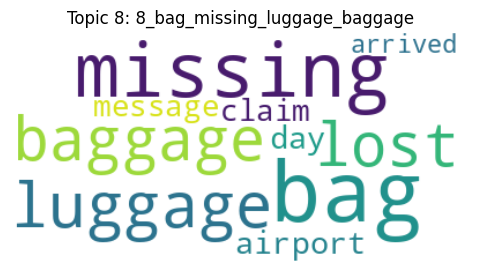

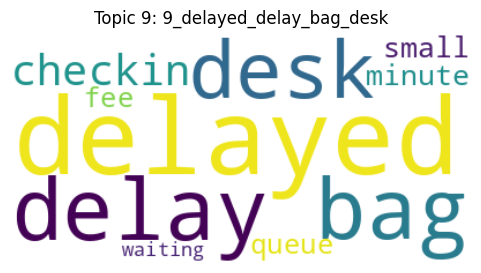

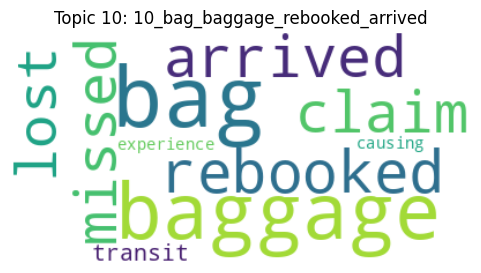

                                      Precision  Recall  F1-Score  Support
Category                                                                  
Food and Beverage                        0.5371  0.9268    0.6801      437
Booking & Check-in Issues                0.1217  0.4194    0.1887      155
Seating Comfort                          0.0000  0.0000    0.0000      271
In-Flight Experience Issues              0.0000  0.0000    0.0000      423
Baggage Problems                         0.1983  0.9324    0.3270      148
Safety & Security Concerns               0.0000  0.0000    0.0000       62
Flight Delays & Cancellations            0.3114  0.9843    0.4732      318
Refund & Compensation Disputes           0.1965  0.8158    0.3167      152
Loyalty Program and benefits             0.0000  0.0000    0.0000       81
Overpriced & Poor Value for Money        0.0000  0.0000    0.0000      199
Accessibility and special assistance     0.0000  0.0000    0.0000       32
Airline Staff & Ground Se

In [ ]:
# ──────────────────────────────────────────────────────────
# 0) Imports & Setup
# ──────────────────────────────────────────────────────────
import re, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud                   # :contentReference[oaicite:0]{index=0}
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report
from umap import UMAP
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer  # :contentReference[oaicite:1]{index=1}
from sentence_transformers import SentenceTransformer

# ──────────────────────────────────────────────────────────
# 1) Load & Preprocess Negative Reviews
# ──────────────────────────────────────────────────────────
df = pd.read_csv("BA_Airline_NegativeReviews_Half.csv")
# tokenize & lowercase
df["processed"] = (
    df["ReviewBody"]
      .str.lower()
      .apply(lambda txt: " ".join(re.findall(r"\w+", txt)))
)
# remove stopwords + domain terms
import nltk; nltk.download("stopwords")
from nltk.corpus import stopwords
custom_stop = {"ba","british","airways","flight","airline","hour","and","the","it"}
stopset = set(stopwords.words("english")).union(custom_stop)
df["processed"] = df["processed"].apply(
    lambda s: " ".join([t for t in s.split() if t not in stopset and not t.isdigit()])
)

docs = df["processed"].tolist()

# ──────────────────────────────────────────────────────────
# 2) Define Your 12 Target Categories & Seed Words
# ──────────────────────────────────────────────────────────
categories = [
  "Food and Beverage",
  "Booking & Check-in Issues",
  "Seating Comfort",
  "In-Flight Experience Issues",
  "Baggage Problems",
  "Safety & Security Concerns",
  "Flight Delays & Cancellations",
  "Refund & Compensation Disputes",
  "Loyalty Program and benefits","Overpriced & Poor Value for Money",
  "Accessibility and special assistance","Airline Staff & Ground Services"
]

# manually select a few prototypical terms per category to steer BERTopic
# 2) Define seed words per category
seed_words = {
    'Food and Beverage': [
        'food', 'bad', 'inedible', 'catering', 'tiny', 'bottle', 'water', 'snack', 'offered', 'poor', 'meal',
        'drinks', 'half', 'cup', 'tasteless', 'stale', 'snacks', 'quality', 'limited', 'options', 'ran', 'out', 'cold', 'bland', 'hungry',
        'unappetizing', 'expired', 'items', 'served', 'vegetarian', 'smell', 'provided', 'beverages', 'tray', 'dirty', 'portion',
        'size', 'small', 'dietary', 'needs', 'ignored', 'spoiled', 'burnt', 'eat', 'low', 'ingredients', 'refreshment',
        'choice', 'drink', 'snack', 'beverage', 'catering', 'coffee', 'breakfast', 'eggs', 'scrambled', 'beef', 'smashed', 'potatoes',
        'chocolate', 'bar', 'biscuits', 'basic'
    ],# :contentReference[oaicite:0]{index=0}
     'Booking & Check-in Issues': [
        'check-in', 'problem', 'boarding', 'pass', 'error', 'reservation', 'ticket', 'valid', 'denied', 'booking', 'couldn’t',
        'online', 'confirmed', 'long', 'queue', 'assigned', 'confusing', 'process', 'system', 'glitch', 'website', 'kept', 'booked',
        'crashing', 'mobile', 'app', 'failed', 'name', 'mismatch', 'duplicate', 'wrong', 'travel', 'dates', 'status', 'agent', 'mistake',
        'counters', 'closed', 'early', 'printed', 'accepted', 'selection', 'checkin', 'confirmation', 'waiting', 'stand', 'deal', 'book',
        'another', 'refused', 'rebooking', 'online', 'standing', 'atrocious', 'Website', 'difficult', 'navigate', 'board', 'retraction',
        'chaos', 'reinstated', 'standby', 'allocated', 'allocation', 'slow', 'organised', 'Chaos', 'management', 'destination',
        'struggling', 'communication', 'email', 'overcrowded', 'crashed', 'computer', 'crowd', 'procedure', 'queue', 'disorganised',
        'impatient', 'crowded', 'replacement', 'electronically', 'unavailable', 'unavailability', 'unusable', 'desk'
    ],# :contentReference[oaicite:1]{index=1}
     'Seating Comfort': [
        'tight', 'legroom', 'seat', 'uncomfortable', 'seats', 'cramped', 'poor', 'design', 'reclining', 'doesn’t', 'recline', 'room',
        'legs', 'broken', 'wouldn’t', 'recline', 'area', 'old', 'worn', 'crowded', 'cabin', 'configuration', 'armrest', 'cushion', 'flat',
        'back', 'support', 'missing', 'aisle', 'exposed', 'tray', 'table', 'felt', 'seatbelt', 'tight', 'overhead', 'bin', 'above', 'match',
        'footrest', 'hard', 'sleep', 'movement', 'seating', 'recline', 'comfort', 'torn', 'cracked', 'jostling',
    ],# :contentReference[oaicite:2]{index=2}
        'In-Flight Experience Issues': [
        'inflight', 'entertainment', 'broken', 'screen', 'WiFi', 'working', 'USB', 'port', 'seatback', 'failed', 'unavailable', 'headphones',
        'provided', 'flight', 'noisy', 'couldn’t', 'access', 'shop', 'system', 'loud', 'cabin', 'noise', 'unclean', 'restrooms', 'dirty',
        'lighting', 'bad', 'smell', 'annoying', 'addressed', 'temperature', 'boring', 'reading', 'materials',
        'air', 'conditioning', 'didn’t', 'work', 'dark', 'day', 'overhead', 'lights', 'respond', 'call', 'button', 'bed',
        'toilet', 'ran', 'supplies', 'felt', 'stuffy', 'announcements', 'window', 'shade', 'magazines', 'missing', 'blankets', 'pillows',
        'space', 'dirty', 'wifi', 'IFE', 'movie', 'movies', 'selection', 'noise', 'temperature', 'cabin', 'IFE', 'headphones',
        'pillow', 'blanket', 'attention', 'attendant', 'AC', 'disturb', 'crying', 'baby', 'shouting', 'facility', 'medium', 'poor', 'charge',
        'point', 'welcome', 'package', 'disrupt', 'disrupted', 'overhead', 'cabin', 'power', 'supply', 'table', 'aisle', 'grabbing', 'tracker',
        'failure', 'joke', 'condition', 'electronics', 'functional', 'blocking', 'coach', 'place', 'comfortably', 'store', 'item', 'holder',
        'entire', 'control', 'size', 'position', 'haul', 'trip', 'touch', 'charger', 'magazine', 'shop', 'old', 'plane', 'filthy', 'brush',
        'tooth brush', 'earplugs', 'socks', 'disposable', 'wifi'
    ],# :contentReference[oaicite:3]{index=3}
        'Baggage Problems': [
        'lost', 'luggage', 'baggage', 'arrived', 'got', 'bag', 'mishandled', 'information', 'hand', 'taken', 'missing', 'Missing', 'suitcase',
        'unclear', 'damaged', 'mishandled', 'bags', 'extra', 'charge', 'tampered', 'claim', 'took', 'long', 'items', 'tags', 'Bags',
        'opened', 'transit', 'received', 'someone', 'else', 'arrived', 'next', 'day', 'tracking', 'available', 'report', 'airport', 'Lost',
        'line', 'chaotic', 'refused', 'help', 'handle', 'broken', 'denied', 'carry', 'cabin', 'overhead', 'limits', 'avoid', 'waiting',
        'pay', 'hour', 'reclaim', 'claim', 'delay', 'personal', 'belonging', 'checked', 'little', 'effort', 'wife', 'reclaim', 'airtags',
        'carryon', 'mistagged', 'tag', 'tags', 'promised', 'discovered', 'destroyed', 'figure', 'handling', 'left', 'behind', 'locate',
        'wheel', 'reported', 'showed', 'trolley', 'mislabelled', 'clothes', 'jewellery', 'Luggage', 'Baggage', 'reconcile', 'collect',
        'space', 'damaged', 'loaded', 'pram', 'stroller', 'counter', 'zip', 'carousel', 'priority'
    ],# :contentReference[oaicite:4]{index=4}
    'Safety & Security Concerns': [
        'unsafe', 'flight', 'safety', 'briefing', 'exit', 'row', 'concern', 'check', 'seatbelts', 'security', 'ignored', 'passenger',
        'aggressive', 'felt', 'equipment', 'faulty', 'seatbelt', 'broken', 'misconduct', 'cockpit', 'door', 'left', 'open',
        'emergency', 'exits', 'blocked', 'lights', 'work', 'pilot', 'announcement', 'unclear', 'dismissed', 'serious', 'behavior',
        'reported', 'cabin', 'takeoff', 'evacuation', 'procedure', 'shown', 'stand', 'landing', 'aircraft', 'maintained', 'officer',
        'absent', 'overhead', 'bin', 'popped', 'incident', 'turbulence', 'horrible', 'experience', 'abuse', 'indication',
        'carrier', 'slammed', 'stranded', 'foreign', 'engine', 'stress', 'heart', 'attack', 'risk', 'hernia', 'sign', 'stopped',
        'evacuated', 'knee', 'suffered', 'medical', 'contempt', 'ineptitude', 'insult', 'injury', 'turmoil', 'weed', 'panicked',
        'horror', 'grotty', 'trapped', 'horrendous', 'secure', 'asthma', 'disappointment', 'family', 'turbulent', 'insecurity',
        'mask', 'facial', 'stressful', 'protocol', 'social', 'safe', 'pandemic', 'threatened', 'awful', 'furious', 'frustrated'
    ],# :contentReference[oaicite:5]{index=5}
     'Flight Delays & Cancellations': [
        'flight', 'delayed', 'missed', 'connection', 'cancelled', 'notice', 'delay', 'reason', 'rescheduled', 'stuck', 'plane', 'departure',
        'waited', 'hours', 'long', 'late', 'last-minute', 'left', 'poor', 'communication', 'connecting', 'multiple', 'alternate',
        'provided', 'weather', 'used', 'excuse', 'arrived', 'causing', 'communicated', 'work', 'tight', 'pilot', 'excuse', 'changedx',
        'tarmac', 'technical', 'fault', 'early', 'morning', 'hotel', 'minute', 'return', 'cancellation', 'Delayed', 'arrival', 'reschedule',
        'cancel', 'rescheduled', 'covid', 'covid19', 'excuse', 'wait', 'takeoff', 'holding', 'rebook', 'late', 'hour', 'departed', 'return',
        'miss', 'cancellation', 'expected', 'minute', 'canceled', 'replacement', 'arrived', 'Cancelled', 'connecting', 'explanation', 'inbound',
        'aircraft', 'zero', 'dismissive', 'rebooked', 'returned', 'technical', 'fault', 'original', 'estimated', 'extended', 'additional',
        'unexpectedly', 'unexpected', 'clearly', 'dismissive', 'unfortunately', 'notifying', 'schedule', 'scheduled', 'terrible', 'several',
        'morning', 'already', 'always', 'apologized', 'acceptable', 'cancel'
    ],# :contentReference[oaicite:6]{index=6}
     'Refund & Compensation Disputes': [
        'refund', 'waiting', 'compensation', 'denied', 'insufficient', 'claim', 'rejected', 'asked', 'money', 'returned', 'penny', 'compensate',
        'reimbursement', 'issue', 'refused', 'pay', 'filed', 'received', 'policy', 'excessive', 'cancellation', 'fee', 'response', 'support',
        'delayed', 'ineligible', 'request', 'chase', 'weeks', 'misleading', 'terms', 'submission', 'worked', 'follow-up', 'airline', 'dispute',
        'explained', 'clearly', 'called', 'multiple', 'times', 'result', 'agent', 'eligible', 'reason', 'processing', 'deducted', 'partial',
        'only', 'reimburse', 'missed', 'connection', 'unfair', 'denial', 'automated', 'system', 'updates', 'refused', 'claimed', 'excuse',
        'reimbursed', 'offered', 'claimed', 'received', 'expense', 'penalty', 'followup', 'refunded', 'refundable', 'multiple', 'call', 'full',
        'partially', 'financial', 'cooling', 'possibility', 'rejection', 'alternative','voucher'
    ],# :contentReference[oaicite:7]{index=7}
    'Loyalty Program and benefits': [
        'Avios', 'devalued', 'elite', 'member', 'upgraded', 'lounge', 'loyalty', 'recognition', 'membership', 'perks', 'lose', 'expect',
        'ignored', 'tier', 'status', 'upgrade', 'program', 'points', 'credited', 'recognized', 'benefits', 'confusing', 'reward', 'system',
        'expire', 'unfairly', 'downgraded', 'reason', 'frequent', 'flyer', 'support', 'useless', 'transparency', 'loyalty', 'privilege',
        'tiers', 'priority', 'access', 'earned', 'miles', 'vanished', 'partner', 'airline', 'honor', 'advertised', 'email', 'downgrade',
        'response', 'team', 'website', 'show', 'updated', 'difficult', 'redeem', 'rewards', 'account', 'blocked', 'number', 'membership',
        'offer',  'avios', 'voucher', 'benefit', 'e-voucher', 'coupon', 'loyal', 'difference', 'business', 'class', 'economy', 'premium',
        'accountability', 'accommodation', 'discount', 'unfair', 'customer', 'room', 'efficiency', 'decency', 'shuttle', 'bus', 'companion',
        'message', 'opted', 'credit', 'credits', 'applying', 'future', 'change', 'hotline', 'sufficient', 'adjust', 'adjusting', 'flexible'
    ],# :contentReference[oaicite:8]{index=8}
    'Overpriced & Poor Value for Money': [
        'worth', 'price', 'overpriced', 'ticket', 'expensive', 'service', 'ripoff', 'charged', 'more', 'value', 'money', 'quality', 'hidden',
        'fees', 'everywhere', 'rip-off', 'felt', 'cheated', 'low', 'fare', 'waste', 'business', 'class', 'economy',
        'downgrade', 'trap', 'charged', 'extra',  'included', 'high', 'costs', 'budget', 'forced', 'last', 'step', 'paid', 'competitors',
        'worse', 'scam', 'pricing', 'tactics', 'charge', 'cost', 'pound', 'euro'
    ],# :contentReference[oaicite:9]{index=9}
    'Accessibility and special assistance': [
        'wheelchair', 'help', 'assistance', 'service', 'poor', 'denied', 'special', 'needed', 'disabled', 'access', 'boarding',
        'provided', 'ignored', 'lack', 'features', 'elderly', 'passengers', 'staff', 'untrained', 'needs', 'rude', 'support', 'inaccessible',
        'restroom', 'visual', 'announcements', 'escort', 'showed', 'rushed', 'despite', 'disability', 'request', 'system', 'empathy',
        'forced', 'walk', 'distance', 'priority', 'respected', 'desk', 'unmanned', 'heavy', 'mobility', 'gear', 'flagged', 'assist',
        'wait', 'vehicle', 'accessibility', 'children', 'unable', 'chair', 'care', 'assist', 'disappointed', 'Denied', 'chairstroller',
        'distress', 'frustration', 'mobile', 'mobility', 'corridor', 'help', 'frustrated', 'nightmare', 'transportation'
    ],# :contentReference[oaicite:10]{index=10}
     'Airline Staff & Ground Services': [
        'staff', 'rude', 'service', 'ground', 'crew', 'unhelpful', 'dismissive', 'help', 'desk', 'attitude', 'helpline', 'reply', 'bullying',
        'unprofessional', 'behavior', 'understaffed', 'callousness', 'ignored', 'complaints', 'disorganized', 'empathise', 'seemed', 'annoyed',
        'communication', 'elderly', 'laughed', 'complaint', 'agent', 'check', 'document', 'properly', 'customer care', 'misleading', 'frustrating',
        'repeated', 'requests', 'rushed', 'threatened', 'remove', 'helpdesk', 'hours', 'blamed', 'system', 'error', 'level', 'embarrassing',
        'worse', 'worst', 'nightmare', 'disgrace', 'get', 'nonexistent', 'staff', 'disrespect', 'respect', 'disappeared', 'laughing', 'rude',
        'attendant', 'employee', 'Staff', 'shortage', 'managed', 'poorly', 'unaware', 'mediocre', 'clueless', 'cleaning', 'unprofessional',
        'bother', 'callous', 'disregard', 'brunt', 'complaint', 'uncaring', 'trained', 'budge', 'argumentative', 'accusatory', 'mediocrity',
        'unsympathetic', 'solve', 'problem', 'cruelty', 'miserable', 'ugly', 'predicament', 'terrible', 'inattentive', 'appalled', 'appaling',
        'incompetent', 'untrustworthy', 'aggressive', 'obnoxious', 'impatient', 'flippant', 'disgusting', 'disappointing', 'abusive', 'arrogant',
        'unapologetic'
    ]# :contentReference[oaicite:11]{index=11}
}

# flatten for ClassTfidfTransformer
flat_seeds = sum(seed_words.values(), [])

# ──────────────────────────────────────────────────────────
# 3) Fit Seeded BERTopic
# ──────────────────────────────────────────────────────────
vectorizer = CountVectorizer(stop_words=list(stopset), min_df=5)
umap_model  = UMAP(n_components=2, n_neighbors=15, min_dist=0.0,
                   metric="cosine", random_state=42)
ctfidf      = ClassTfidfTransformer(
    seed_words=flat_seeds,
    seed_multiplier=3,            # boost seed terms :contentReference[oaicite:2]{index=2}
    reduce_frequent_words=True
)

topic_model = BERTopic(
    vectorizer_model=vectorizer,
    umap_model=umap_model,
    ctfidf_model=ctfidf,
    calculate_probabilities=True
)

topics, _ = topic_model.fit_transform(docs)
# approximate full prob matrix (n_docs × 12)
probs, _ = topic_model.approximate_distribution(docs)    # :contentReference[oaicite:3]{index=3}

# ──────────────────────────────────────────────────────────
# 4) Generate & Save Word‑Clouds for Each Topic
# ──────────────────────────────────────────────────────────
import matplotlib.pyplot as plt
from wordcloud import WordCloud

topic_info = topic_model.get_topic_info()
# Ensure -1 is excluded, if you never want the outlier cluster:
topic_ids  = topic_info.loc[topic_info.Topic != -1, "Topic"].tolist()

# Make one word cloud per real topic (exclude –1)
for tid in topic_info.loc[topic_info.Topic != -1, "Topic"]:
    freqs = dict(topic_model.get_topic(tid))
    wc = WordCloud(width=400, height=200, background_color="white")
    wc.generate_from_frequencies(freqs)

    plt.figure(figsize=(6,3))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    # you can customize the title however you like:
    name = topic_info.loc[topic_info.Topic == tid, "Name"].values[0]
    plt.title(f"Topic {tid}: {name}")
    plt.show()


# ──────────────────────────────────────────────────────────
# 5) Semantic Map: Topic IDs → Our 12 Categories
# ──────────────────────────────────────────────────────────
embedder = SentenceTransformer("all-MiniLM-L6-v2")
cat_embs  = embedder.encode(categories, normalize_embeddings=True)
topic2class = {}
for tid in topic_model.get_topic_info().Topic:
    if tid < 0: continue
    words = [w for w,_ in topic_model.get_topic(tid)][:10]
    emb   = embedder.encode(" ".join(words), normalize_embeddings=True)
    topic2class[tid] = categories[cosine_similarity([emb], cat_embs)[0].argmax()]

# ──────────────────────────────────────────────────────────
# 6) Multi‑Label Prediction: Top‑5 per Doc (threshold=0.02)
# ──────────────────────────────────────────────────────────
def predict_multi_labels(probs_row, topk=5, min_prob=0.02):
    """
    Given a 1×K array of topic‐probs, return up to `topk` categories
    whose probability ≥ min_prob.
    """
    # sort topic indices by descending probability
    idxs = np.argsort(probs_row)[::-1]
    preds = []
    for i in idxs[:topk]:
        prob = float(probs_row[i])     # ensure a scalar
        if prob < min_prob:
            break
        tid = topic_ids[i]
        cls = topic2class.get(tid)
        if cls and cls not in preds:
            preds.append(cls)
    return preds

# 3) Apply to every document
df["predicted_classes"] = [predict_multi_labels(row) for row in probs]

# ──────────────────────────────────────────────────────────
# 7) Load Manual JSON & Build Ground‑Truth Multi‑Labels
# ──────────────────────────────────────────────────────────
with open("BA_Airline_LabelStudio_Annotations.json","r") as f:
    manual = json.load(f)

manual_records = []
for rec in manual:
    text   = rec["data"]["ReviewBody"]
    labels = [r["value"]["labels"][0] for r in rec["annotations"][0]["result"]]
    manual_records.append({"ReviewBody": text, "manual_labels": labels})

ls_df = pd.DataFrame(manual_records)

# ──────────────────────────────────────────────────────────
# 8) Merge Predictions & Ground‑Truth
# ──────────────────────────────────────────────────────────
merged = pd.merge(ls_df, df[["ReviewBody","predicted_classes"]],
                  on="ReviewBody", how="inner")

# ──────────────────────────────────────────────────────────
# 9) Compute & Display Precision, Recall, F1, Support
# ──────────────────────────────────────────────────────────
from collections import Counter
counts = {c: Counter() for c in categories}

for _, row in merged.iterrows():
    true_set = set(row["manual_labels"])
    pred_set = set(row["predicted_classes"])
    for c in categories:
        if c in true_set and c in pred_set: counts[c]["TP"] += 1
        if c not in true_set and c in pred_set: counts[c]["FP"] += 1
        if c in true_set and c not in pred_set: counts[c]["FN"] += 1

results = []
for c in categories:
    TP, FP, FN = counts[c]["TP"], counts[c]["FP"], counts[c]["FN"]
    prec = TP/(TP+FP) if TP+FP else 0
    rec  = TP/(TP+FN) if TP+FN else 0
    f1   = 2*prec*rec/(prec+rec) if prec+rec else 0
    sup  = TP+FN
    results.append({"Category":c,
                    "Precision":round(prec,4),
                    "Recall":   round(rec,4),
                    "F1-Score": round(f1,4),
                    "Support":  sup})
report_df = pd.DataFrame(results).set_index("Category")
print(report_df)


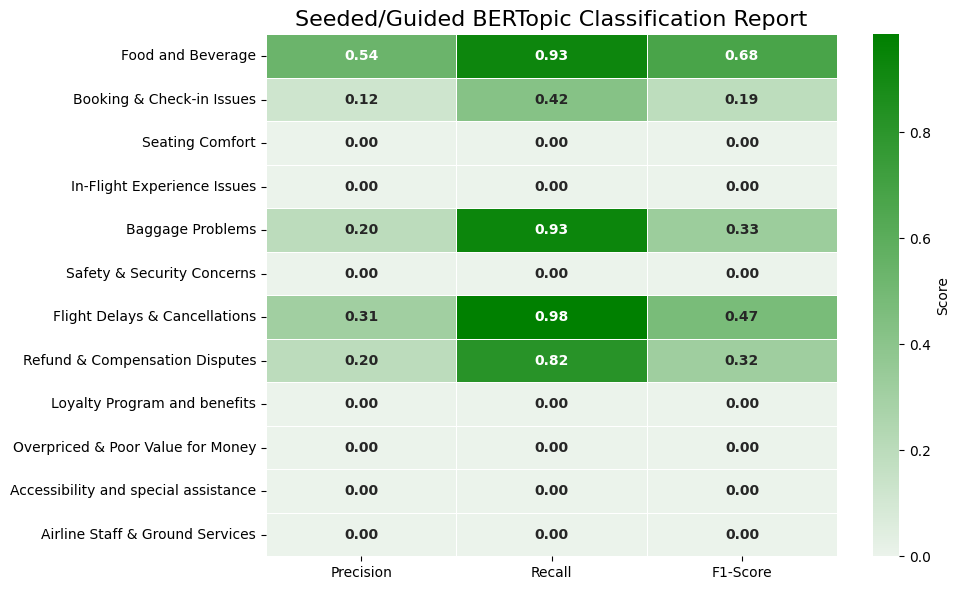

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming report_df already exists from your seeded/guided BERTopic
# and has index=Category, columns=["Precision","Recall","F1-Score","Support"]

plt.figure(figsize=(10, 6))
sns.heatmap(
    report_df[["Precision", "Recall", "F1-Score"]],
    annot=True,
    fmt=".2f",
    cmap=sns.light_palette("green", as_cmap=True),
    cbar_kws={"label": "Score"},
    linewidths=0.5,
    linecolor="white",
    annot_kws={"weight": "bold"}
)
plt.title("Seeded/Guided BERTopic Classification Report", fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.show()


# 3. Zero-shot learning Classification

In [ ]:
# ──────────────────────────────────────────────────────────
# 0) Install & Imports
# ──────────────────────────────────────────────────────────
!pip install sentence-transformers scikit-learn pandas numpy

from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from collections import Counter
import pandas as pd
import json

In [ ]:

# ──────────────────────────────────────────────────────────
# 1) Load Your Data & Manual Annotations
# ──────────────────────────────────────────────────────────
# (Assumes you’ve already loaded df with raw ReviewBody.)
df = pd.read_csv("BA_Airline_NegativeReviews_Half.csv")

with open("BA_Airline_LabelStudio_Annotations.json","r") as f:
    manual = json.load(f)

# Build a DataFrame of manual labels
records = []
for rec in manual:
    text   = rec["data"]["ReviewBody"]
    labels = [r["value"]["labels"][0] for r in rec["annotations"][0]["result"]]
    records.append({"ReviewBody": text, "manual_labels": labels})
ls_df = pd.DataFrame(records)

# Merge to align
df = pd.merge(df, ls_df, on="ReviewBody", how="inner")

# ──────────────────────────────────────────────────────────
# 2) Define Your 12 Categories
# ──────────────────────────────────────────────────────────
categories = [
    "Food and Beverage",
    "Booking & Check-in Issues",
    "Seating Comfort",
    "In-Flight Experience Issues",
    "Baggage Problems",
    "Safety & Security Concerns",
    "Flight Delays & Cancellations",
    "Refund & Compensation Disputes",
    "Loyalty Program and benefits",
    "Overpriced & Poor Value for Money",
    "Accessibility and special assistance",
    "Airline Staff & Ground Services"
]

# ──────────────────────────────────────────────────────────
# 3) Embed Reviews & Categories
# ──────────────────────────────────────────────────────────
embedder = SentenceTransformer("all-MiniLM-L6-v2")
docs      = df["ReviewBody"].tolist()
doc_embs  = embedder.encode(docs, convert_to_tensor=True, normalize_embeddings=True)
cat_embs  = embedder.encode(categories, convert_to_tensor=True, normalize_embeddings=True)

# ──────────────────────────────────────────────────────────
# 4) Compute Cosine Similarities & Zero‑Shot Labels
# ──────────────────────────────────────────────────────────
# cosine_sim shape: (n_docs, 12)
cosine_sim = util.cos_sim(doc_embs, cat_embs).cpu().numpy()

# Prediction parameters
THRESHOLD = 0.30   # minimum similarity to accept a category
TOPK      = 5      # maximum labels per review

predicted_zs = []
for sims in cosine_sim:
    # find all categories above threshold
    idxs = [i for i,score in enumerate(sims) if score >= THRESHOLD]
    # if none, pick the single highest
    if not idxs:
        idxs = [sims.argmax()]
    # limit to TOPK highest
    idxs = sorted(idxs, key=lambda i: sims[i], reverse=True)[:TOPK]
    predicted_zs.append([categories[i] for i in idxs])

df["predicted_zs"] = predicted_zs

# ──────────────────────────────────────────────────────────
# 5) Show Raw Tag Counts by Class
# ──────────────────────────────────────────────────────────
manual_counts   = Counter([lab for labs in df["manual_labels"]   for lab in labs])
predicted_counts= Counter([lab for labs in df["predicted_zs"]    for lab in labs])

counts_df = (
    pd.DataFrame.from_dict({
        "manual_count":   manual_counts,
        "predicted_count":predicted_counts
    }, orient="index")
    .reindex(categories)
    .fillna(0)
    .astype(int)
)



In [ ]:
# ──────────────────────────────────────────────────────────
# 6) Multi‑Label Classification Report
# ──────────────────────────────────────────────────────────
mlb      = MultiLabelBinarizer(classes=categories)
y_true   = mlb.fit_transform(df["manual_labels"])
y_pred   = mlb.transform(df["predicted_zs"])

report = classification_report(
    y_true, y_pred, target_names=categories, zero_division=0, digits=4
)
print("\n=== Zero‑Shot Classification Report ===\n")
print(report)



=== Zero‑Shot Classification Report ===

                                      precision    recall  f1-score   support

                   Food and Beverage     0.8696    0.1373    0.2372       437
           Booking & Check-in Issues     0.1796    0.9226    0.3007       155
                     Seating Comfort     0.5248    0.4686    0.4951       271
         In-Flight Experience Issues     0.4343    0.9149    0.5890       423
                    Baggage Problems     0.2404    0.8919    0.3788       148
          Safety & Security Concerns     0.0000    0.0000    0.0000        62
       Flight Delays & Cancellations     0.3566    0.9465    0.5181       318
      Refund & Compensation Disputes     0.8065    0.4934    0.6122       152
        Loyalty Program and benefits     0.3000    0.0370    0.0659        81
   Overpriced & Poor Value for Money     0.5714    0.0201    0.0388       199
Accessibility and special assistance     0.5000    0.0938    0.1579        32
     Airline Staff & 

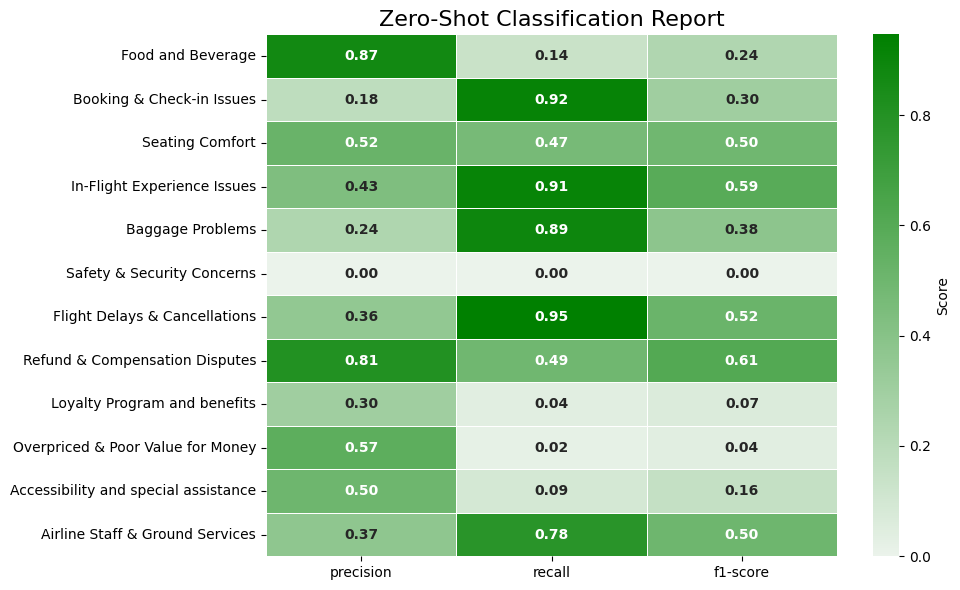

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# 1) Generate the classification report as a dict
report_dict = classification_report(
    y_true,
    y_pred,
    target_names=categories,
    zero_division=0,
    output_dict=True,
    digits=4
)

# 2) Convert to DataFrame
report_df = pd.DataFrame(report_dict).T

# 3) Plot heatmap for precision, recall, f1-score
plt.figure(figsize=(10, 6))
sns.heatmap(
    report_df.loc[categories, ['precision', 'recall', 'f1-score']],
    annot=True,
    fmt=".2f",
    cmap=sns.light_palette("green", as_cmap=True),
    cbar_kws={"label": "Score"},
    linewidths=0.5,
    linecolor="white",
    annot_kws={"weight": "bold"}
)
plt.title("Zero‑Shot Classification Report", fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.show()


# 4. Zero-shot learning+ Bertopic Classification-- Hybrid Model

In [ ]:
# ──────────────────────────────────────────────────────────
# 0) Install dependencies
# ──────────────────────────────────────────────────────────
!pip install bertopic[all] umap-learn hdbscan sentence-transformers wordcloud scikit-learn matplotlib pandas

# ──────────────────────────────────────────────────────────
# A) Imports
# ──────────────────────────────────────────────────────────
import re, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from umap import UMAP
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from sentence_transformers import SentenceTransformer
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# ──────────────────────────────────────────────────────────
# B) Load & Preprocess Reviews
# ──────────────────────────────────────────────────────────
df = pd.read_csv("BA_Airline_NegativeReviews_Half.csv")
# lowercase + keep words only
df["processed"] = (
    df["ReviewBody"]
      .str.lower()
      .str.findall(r"\w+")
      .apply(" ".join)
)
# remove stopwords + domain terms
custom_stop = {"ba","british","airways","flight","airline","hour"}
stopset = set(stopwords.words("english")).union(custom_stop)
df["processed"] = df["processed"].apply(
    lambda txt: " ".join(w for w in txt.split() if w not in stopset and not w.isdigit())
)
docs = df["processed"].tolist()

# ──────────────────────────────────────────────────────────
# C) Seeded BERTopic (12 clusters guaranteed)
# ──────────────────────────────────────────────────────────
categories = [
  "Food and Beverage","Booking & Check-in Issues","Seating Comfort",
  "In-Flight Experience Issues","Baggage Problems","Safety & Security Concerns",
  "Flight Delays & Cancellations","Refund & Compensation Disputes",
  "Loyalty Program and benefits","Overpriced & Poor Value for Money",
  "Accessibility and special assistance","Airline Staff & Ground Services"
]

seed_words = {
  "Food and Beverage":          ["food","meal","drink","snack"],
  "Booking & Check-in Issues":  ["booking","check-in","reservation","ticket"],
  "Seating Comfort":            ["seat","legroom","comfort"],
  "In-Flight Experience Issues":["entertainment","wifi","crew","cabin"],
  "Baggage Problems":           ["luggage","baggage","bag","lost"],
  "Safety & Security Concerns": ["safety","security","emergency","risk"],
  "Flight Delays & Cancellations":["delay","cancelled","reschedule"],
  "Refund & Compensation Disputes":["refund","compensation","voucher"],
  "Loyalty Program and benefits":["loyalty","points","miles"],
  "Overpriced & Poor Value for Money":["expensive","pricey","overpriced"],
  "Accessibility and special assistance":["wheelchair","assist","disabled"],
  "Airline Staff & Ground Services":["staff","ground","service","crew"]
}
flat_seeds = sum(seed_words.values(), [])

vectorizer = CountVectorizer(stop_words=list(stopset), min_df=5)
umap_model  = UMAP(n_neighbors=15, min_dist=0.0, metric="cosine", random_state=42)
ctfidf      = ClassTfidfTransformer(seed_words=flat_seeds, seed_multiplier=3,
                                    reduce_frequent_words=True)

topic_model = BERTopic(
    vectorizer_model=vectorizer,
    umap_model=umap_model,
    ctfidf_model=ctfidf,
    calculate_probabilities=True
)

topics, probs = topic_model.fit_transform(docs)  # topics:list, probs: np.array (n_docs×12)

# Capture primary topic for ARI/NMI later
primary_topics = np.array(topics)

# ──────────────────────────────────────────────────────────
# D) Zero‑Shot via SentenceEmbedding Cosine
# ──────────────────────────────────────────────────────────
embedder = SentenceTransformer("all-MiniLM-L6-v2")
doc_embs  = embedder.encode(docs,  convert_to_tensor=False, normalize_embeddings=True)
cat_embs  = embedder.encode(categories, convert_to_tensor=False, normalize_embeddings=True)

cos_sim = cosine_similarity(doc_embs, cat_embs)
ZS_THRESH, TOPK_ZS = 0.30, 3

zs_preds = []
for row in cos_sim:
    idxs = [i for i, sc in enumerate(row) if sc >= ZS_THRESH]
    if not idxs:
        idxs = [row.argmax()]
    idxs = sorted(idxs, key=lambda i: row[i], reverse=True)[:TOPK_ZS]
    zs_preds.append([categories[i] for i in idxs])

df["zs_preds"] = zs_preds  # length = 1102

# ──────────────────────────────────────────────────────────
# E) BERTopic → Category Mapping & Predictions
# ──────────────────────────────────────────────────────────
# build topic→category map by semantic matching of top keywords
topic2class = {}
for tid in topic_model.get_topic_info().Topic:
    if tid < 0: continue
    words = [w for w,_ in topic_model.get_topic(tid)][:10]
    emb   = embedder.encode(" ".join(words), normalize_embeddings=True)
    topic2class[tid] = categories[cosine_similarity([emb], cat_embs)[0].argmax()]

def bertopic_labels(probs_row, topk=5, minp=0.02):
    idxs = np.argsort(probs_row)[::-1]
    labs = []
    for i in idxs[:topk]:
        if float(probs_row[i]) < minp:
            break
        cls = topic2class.get(topic_model.get_topic_info().Topic.tolist()[i])
        if cls and cls not in labs:
            labs.append(cls)
    return labs

df["bt_preds"] = [bertopic_labels(row) for row in probs]

# ──────────────────────────────────────────────────────────
# F) Hybrid = union(BERTopic, Zero‑Shot)
# ──────────────────────────────────────────────────────────
df["predicted_hybrid"] = df.apply(
    lambda r: list({*r["bt_preds"], *r["zs_preds"]}), axis=1
)

# ──────────────────────────────────────────────────────────
# G) Merge with Manual JSON Labels (1,101 rows)
# ──────────────────────────────────────────────────────────
manual = pd.DataFrame([{
    "ReviewBody": rec["data"]["ReviewBody"],
    "manual_labels": [r["value"]["labels"][0] for r in rec["annotations"][0]["result"]]
} for rec in json.load(open("BA_Airline_LabelStudio_Annotations.json"))])

df_eval = pd.merge(df, manual, on="ReviewBody", how="inner")

# ──────────────────────────────────────────────────────────
# H) Multi‑Label Classification Report
# ──────────────────────────────────────────────────────────
mlb    = MultiLabelBinarizer(classes=categories)
y_true = mlb.fit_transform(df_eval["manual_labels"])
y_pred = mlb.transform(df_eval["predicted_hybrid"])

print("=== Hybrid Classification Report ===\n")
print(classification_report(
    y_true, y_pred, target_names=categories, zero_division=0, digits=4
))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=== Hybrid Classification Report ===

                                      precision    recall  f1-score   support

                   Food and Beverage     0.8953    0.1762    0.2945       437
           Booking & Check-in Issues     0.2012    0.8452    0.3251       155
                     Seating Comfort     0.5280    0.4871    0.5067       271
         In-Flight Experience Issues     0.5144    0.7187    0.5996       423
                    Baggage Problems     0.1463    0.9054    0.2519       148
          Safety & Security Concerns     0.2500    0.0161    0.0303        62
       Flight Delays & Cancellations     0.5357    0.7547    0.6266       318
      Refund & Compensation Disputes     0.1806    0.9211    0.3020       152
        Loyalty Program and benefits     0.3571    0.0617    0.1053        81
   Overpriced & Poor Value for Money     0.4286    0.0151    0.0291       199
Accessibility and special assistance     0.2667    0.1250    0.1702        32
     Airline Staff & Grou

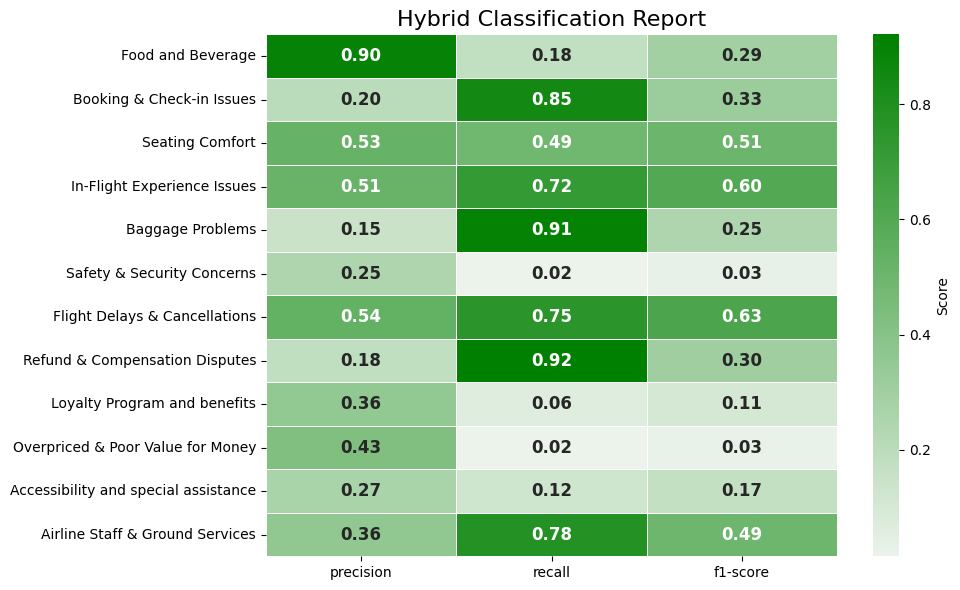

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report

# ──────────────────────────────────────────────────────────
# Assumes `df_eval` and `categories` are already in scope:
#   df_eval: DataFrame with cols ["ReviewBody","manual_labels","predicted_hybrid"]
#   categories: list of your 12 category names
# ──────────────────────────────────────────────────────────

# 1) Build the true / pred multi-hot arrays
mlb    = MultiLabelBinarizer(classes=categories)
y_true = mlb.fit_transform(df_eval["manual_labels"])
y_pred = mlb.transform(df_eval["predicted_hybrid"])

# 2) Create DataFrame from classification_report
report_dict = classification_report(
    y_true, y_pred,
    target_names=categories,
    zero_division=0,
    output_dict=True,
    digits=4
)
report_df = pd.DataFrame(report_dict).T

# 3) Plot only precision, recall, f1-score
plt.figure(figsize=(10, 6))
sns.heatmap(
    report_df.loc[categories, ['precision','recall','f1-score']],
    annot=True,
    fmt=".2f",
    cmap=sns.light_palette("green", as_cmap=True),
    cbar_kws={"label": "Score"},
    linewidths=0.5,
    linecolor="white",
    annot_kws={"weight":"bold", "size":12}
)
plt.title("Hybrid Classification Report", fontsize=16)
plt.yticks(rotation=0)    # keep category names horizontal
plt.tight_layout()
plt.show()


In [ ]:
# ──────────────────────────────────────────────────────────
# I) Save Word‑Clouds into a single HTML page
# ──────────────────────────────────────────────────────────
import base64
from io import BytesIO

wordcloud_html = ["<html><body><h1>BERTopic Word‑Clouds</h1>"]
info = topic_model.get_topic_info().query("Topic >= 0")

for tid in info.Topic:
    freqs = dict(topic_model.get_topic(tid))
    wc = WordCloud(width=400, height=200).generate_from_frequencies(freqs)

    # save to PNG in-memory
    buf = BytesIO()
    wc.to_image().save(buf, format="PNG")
    data = base64.b64encode(buf.getvalue()).decode()
    wordcloud_html.append(f"<h2>Topic {tid}: {info.set_index('Topic').loc[tid,'Name']}</h2>")
    wordcloud_html.append(f'<img src="data:image/png;base64,{data}"><br>')

wordcloud_html.append("</body></html>")

with open("wordclouds.html","w") as f:
    f.write("\n".join(wordcloud_html))

print("✅ Saved combined word‑clouds to wordclouds.html")


# ──────────────────────────────────────────────────────────
# II) Save BERTopic Interactive Map & Barchart
# ──────────────────────────────────────────────────────────
fig_topics   = topic_model.visualize_topics()
fig_barchart = topic_model.visualize_barchart(top_n_topics=12, n_words=8)

fig_topics.write_html("BA_Airline_BERTopic_Visualization.html")
fig_barchart.write_html("BA_Airline_BERTopic_Barchart.html")

print("✅ Saved interactive topics → BA_Airline_BERTopic_Visualization.html")
print("✅ Saved bar‑chart → BA_Airline_BERTopic_Barchart.html")


✅ Saved combined word‑clouds to wordclouds.html
✅ Saved interactive topics → interactive_topics.html
✅ Saved bar‑chart → bertopic_barchart.html


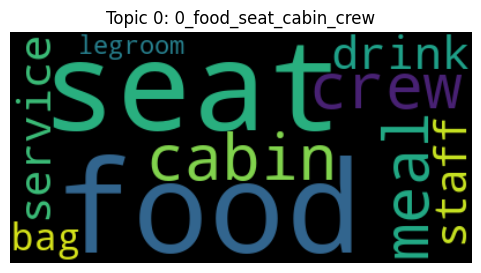

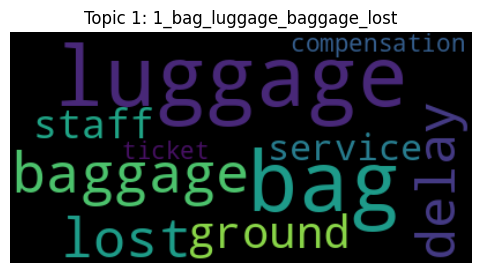

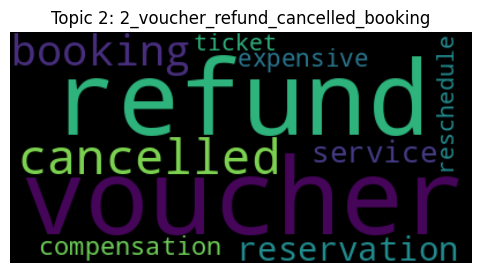

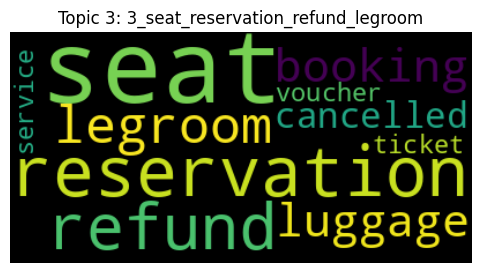

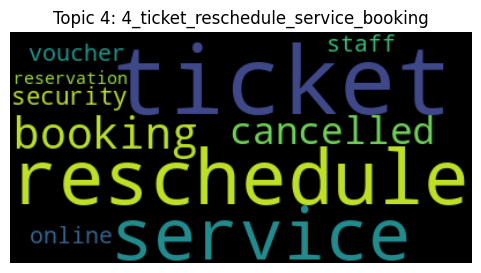

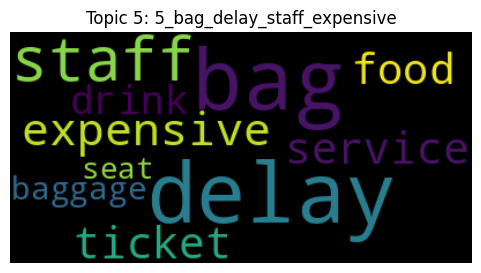

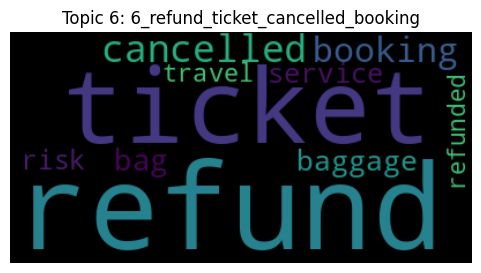

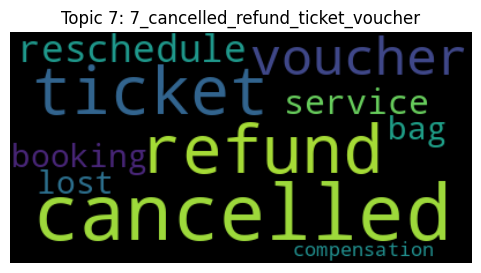

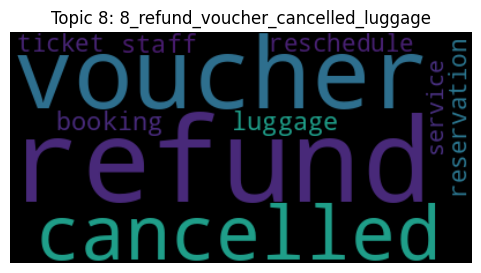

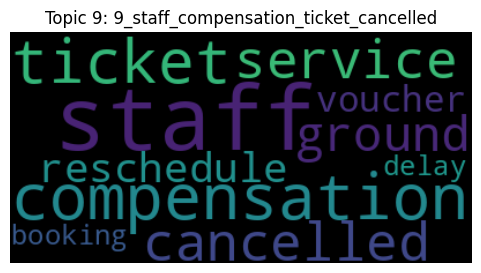

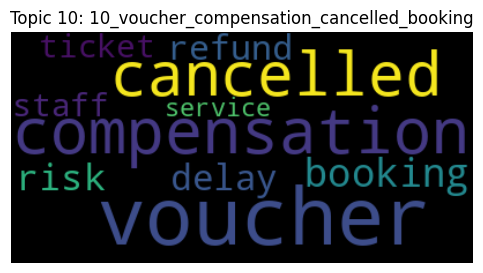

In [ ]:
# ──────────────────────────────────────────────────────────
# I) Word‑Clouds & BERTopic Visualizations
# ──────────────────────────────────────────────────────────
info = topic_model.get_topic_info().loc[lambda d: d.Topic>=0]
for tid in info.Topic:
    freqs = dict(topic_model.get_topic(tid))
    wc    = WordCloud(width=400, height=200).generate_from_frequencies(freqs)
    plt.figure(figsize=(6,3)); plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {tid}: " + info.set_index("Topic").loc[tid,"Name"])
    plt.show()

# interactive map & barchart
topic_model.visualize_topics().show()
topic_model.visualize_barchart(top_n_topics=12, n_words=8).show()



In [ ]:
# ──────────────────────────────────────────────────────────
# K) ARI & NMI vs. Manual Primary Label
# ──────────────────────────────────────────────────────────
# manual primary = first label
# ──────────────────────────────────────────────────────────
# I½) Filter out any reviews without a manual label (empty lists)
# ──────────────────────────────────────────────────────────
df_eval = df_eval[df_eval["manual_labels"].map(len) > 0].reset_index(drop=True)

# manual primary = first label in the list
man_primary = df_eval["manual_labels"].apply(lambda x: x[0])
le = LabelEncoder()
y_man = le.fit_transform(man_primary)

# align BERTopic’s primary topic array to df_eval’s rows
y_bt  = primary_topics[df_eval.index]
mask  = y_bt >= 0  # drop any -1 if present

ari = adjusted_rand_score(y_man[mask], y_bt[mask])
nmi = normalized_mutual_info_score(y_man[mask], y_bt[mask])

print(f"Adjusted Rand Index:    {ari:.4f}")
print(f"Normalized Mutual Info: {nmi:.4f}")


Adjusted Rand Index:    0.0081
Normalized Mutual Info: 0.0515


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1) Make sure df_eval still has your manual_labels and predicted_hybrid
#    (If not, re‑merge or reuse the existing df_eval from the hybrid run.)

# 2) Drop any rows without at least one hybrid label (should be none, but just in case)
df_eval = df_eval[df_eval["predicted_hybrid"].map(len)>0].reset_index(drop=True)

# 3) Extract primary strings
man_primary    = df_eval["manual_labels"].str[0]
hybrid_primary = df_eval["predicted_hybrid"].str[0]

# 4) Encode both with the same LabelEncoder
le = LabelEncoder().fit(categories)   # your 12 classes list
y_man    = le.transform(man_primary)
y_hybrid = le.transform(hybrid_primary)

# 5) Compute ARI & NMI for the hybrid “primary”
ari_hybrid = adjusted_rand_score(y_man, y_hybrid)
nmi_hybrid = normalized_mutual_info_score(y_man, y_hybrid)

print(f"Hybrid ARI: {ari_hybrid:.4f}")
print(f"Hybrid NMI: {nmi_hybrid:.4f}")


Hybrid ARI: 0.0052
Hybrid NMI: 0.0564


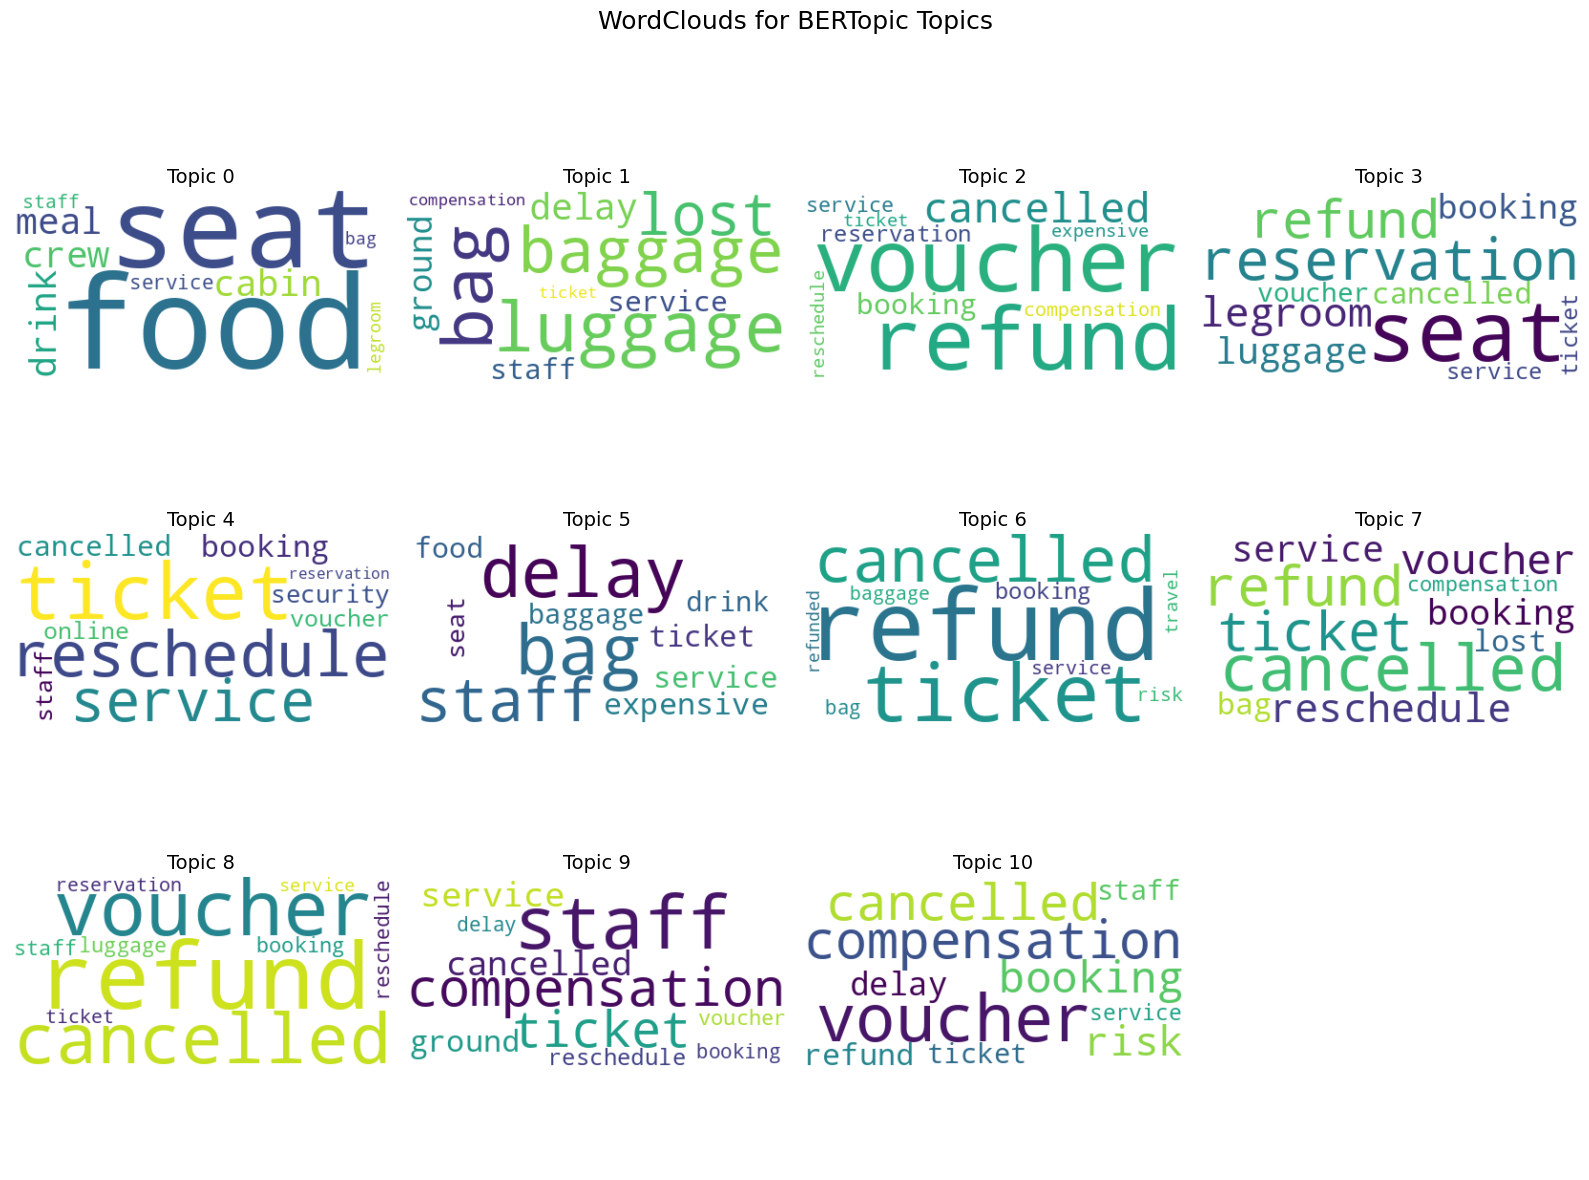

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_topic_wordclouds(topic_model, num_words=15, cols=3):
    """
    Plots word‑clouds for every BERTopic topic (>=0) in a grid.

    Parameters:
    - topic_model: your fitted BERTopic instance
    - num_words:    how many top words per topic to include
    - cols:         number of columns in the grid
    """
    # 1) Get the list of valid topic IDs (exclude -1)
    info = topic_model.get_topic_info().query("Topic >= 0")
    topic_ids = info.Topic.tolist()

    # 2) Compute grid size
    rows = (len(topic_ids) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols,
                             figsize=(4 * cols, 4 * rows),
                             squeeze=False)
    fig.suptitle("WordClouds for BERTopic Topics", fontsize=18)

    # 3) Loop through each topic and draw its word‑cloud
    for idx, topic_id in enumerate(topic_ids):
        # get top-N words → frequency dict
        freqs = dict(topic_model.get_topic(topic_id)[:num_words])

        # generate the cloud
        wc = WordCloud(
            background_color="white",
            colormap="viridis"
        ).generate_from_frequencies(freqs) if freqs else None

        # find subplot
        row, col = divmod(idx, cols)
        ax = axes[row][col]

        if wc:
            ax.imshow(wc, interpolation="bilinear")
        ax.set_title(f"Topic {topic_id}", fontsize=14)
        ax.axis("off")

    # 4) Turn off any unused subplots
    for j in range(len(topic_ids), rows * cols):
        r, c = divmod(j, cols)
        axes[r][c].axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# ───────────────────────────────────────────
# Example usage:
plot_topic_wordclouds(topic_model, num_words=20, cols=4)


In [ ]:
# ──────────────────────────────────────────────────────────
# J) Coherence & Topic Diversity (manual via Gensim)
# ──────────────────────────────────────────────────────────
#!pip install gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# 1) Tokenize your processed docs
tokenized_docs = [doc.split() for doc in df["processed"]]

# 2) Build a Gensim dictionary & filter extremes (same as before)
dictionary = Dictionary(tokenized_docs)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# 3) Extract your BERTopic topics as lists of words
topic_ids = info.Topic.tolist()                     # from earlier get_topic_info() filter
topics = [
    [word for word,_ in topic_model.get_topic(tid)]
    for tid in topic_ids
]

# 4) Build & run the coherence model
coherence_model = CoherenceModel(
    topics=topics,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence='c_v'
)
coh = coherence_model.get_coherence()
print(f"\nCoherence (C_v): {coh:.4f}")

# 5) Topic Diversity (same as before)
topn = 15
all_words = [w for tid in topic_ids for w,_ in topic_model.get_topic(tid)[:topn]]
diversity = len(set(all_words)) / len(all_words)
print(f"Topic Diversity: {diversity:.4f}")



Coherence (C_v): 0.3964
Topic Diversity: 0.2818


# 5. Zero-shot learning+Bertopic Classifier-2

In [1]:
# ──────────────────────────────────────────────────────────
# 0) Install dependencies (run once)
# ──────────────────────────────────────────────────────────
!pip install bertopic[all] umap-learn hdbscan sentence-transformers wordcloud scikit-learn matplotlib pandas gensim torch torchvision transformers

# %%
!pip install torch torchvision transformers

# %%
!pip install bitsandbytes

# %%
!pip install bertopic

In [2]:
# ──────────────────────────────────────────────────────────
# A) Imports
# ──────────────────────────────────────────────────────────
import re, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from umap import UMAP
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from sentence_transformers import SentenceTransformer

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# ──────────────────────────────────────────────────────────
# B) Load & Preprocess All Reviews
# ──────────────────────────────────────────────────────────
df_full = pd.read_csv("BA_Airline_NegativeReviews_Half.csv")
df_full["processed"] = (
    df_full["ReviewBody"]
        .str.lower()
        .str.findall(r"\w+")
        .apply(" ".join)
)
custom_stop = {"ba","british","airways","flight","airline","hour"}
stopset = set(stopwords.words("english")).union(custom_stop)
df_full["processed"] = df_full["processed"].apply(
    lambda txt: " ".join(w for w in txt.split() if w not in stopset and not w.isdigit())
)
docs_full = df_full["processed"].tolist()

# ──────────────────────────────────────────────────────────
# C) Load Manual JSON Labels & Merge → df_eval
# ──────────────────────────────────────────────────────────
manual = []
for rec in json.load(open("BA_Airline_LabelStudio_Annotations.json")):
    manual.append({
        "ReviewBody": rec["data"]["ReviewBody"],
        "manual_labels": [r["value"]["labels"][0] for r in rec["annotations"][0]["result"]]
    })
ls_df = pd.DataFrame(manual)

# merge to get only reviews with manual labels
df_eval = pd.merge(df_full, ls_df, on="ReviewBody", how="inner")
docs_eval = df_eval["processed"].tolist()

# ──────────────────────────────────────────────────────────
# D) Fit Seeded BERTopic on Full Corpus
# ──────────────────────────────────────────────────────────
categories = [
  "Food and Beverage","Booking & Check-in Issues","Seating Comfort",
  "In-Flight Experience Issues","Baggage Problems","Safety & Security Concerns",
  "Flight Delays & Cancellations","Refund & Compensation Disputes",
  "Loyalty Program and benefits","Overpriced & Poor Value for Money",
  "Accessibility and special assistance","Airline Staff & Ground Services"
]
seed_words = {
  cat: kws for cat,kws in {
    "Food and Beverage":          ["food","meal","drink","snack"],
    "Booking & Check-in Issues":  ["booking","check-in","reservation","ticket"],
    "Seating Comfort":            ["seat","legroom","comfort"],
    "In-Flight Experience Issues":["entertainment","wifi","crew","cabin"],
    "Baggage Problems":           ["luggage","bag","lost","baggage"],
    "Safety & Security Concerns": ["safety","security","emergency","risk"],
    "Flight Delays & Cancellations":["delay","cancel","reschedule"],
    "Refund & Compensation Disputes":["refund","compensation","voucher"],
    "Loyalty Program and benefits":["loyalty","points","miles"],
    "Overpriced & Poor Value for Money":["expensive","pricey","overpriced"],
    "Accessibility and special assistance":["wheelchair","assist","disabled"],
    "Airline Staff & Ground Services":["staff","ground","crew","service"]
  }.items()
}
flat_seeds = sum(seed_words.values(), [])


# Increased max_df from 0.95 to 0.99 to prevent the min_df/max_df clash
vectorizer = CountVectorizer(stop_words=list(stopset), min_df=3, max_df=0.99)
umap_model  = UMAP(n_neighbors=15, min_dist=0.0, metric="cosine", random_state=42)
ctfidf      = ClassTfidfTransformer(seed_words=flat_seeds, seed_multiplier=3,
                                    reduce_frequent_words=True)

topic_model = BERTopic(
    vectorizer_model=vectorizer,
    umap_model=umap_model,
    ctfidf_model=ctfidf,
    calculate_probabilities=True
)

topics_full, probs_full = topic_model.fit_transform(docs_full)  # full fit
primary_full = np.array(topics_full)

# ──────────────────────────────────────────────────────────
# E) Zero‑Shot on Full Corpus
# ──────────────────────────────────────────────────────────
embedder = SentenceTransformer("all-MiniLM-L6-v2")
doc_embs_full = embedder.encode(docs_full, normalize_embeddings=True)
cat_embs      = embedder.encode(categories, normalize_embeddings=True)

cos_sim_full = cosine_similarity(doc_embs_full, cat_embs)
ZS_THRESH, TOPK_ZS = 0.30, 3

zs_preds_full = []
for sims in cos_sim_full:
    idxs = [i for i,s in enumerate(sims) if s >= ZS_THRESH] or [sims.argmax()]
    idxs = sorted(idxs, key=lambda i: sims[i], reverse=True)[:TOPK_ZS]
    zs_preds_full.append([categories[i] for i in idxs])

df_full["zs_preds"] = zs_preds_full

# ──────────────────────────────────────────────────────────
# F) Build topic→category Map & BERTopic Predictions
# ──────────────────────────────────────────────────────────
topic2class = {}
for tid in topic_model.get_topic_info().Topic:
    if tid<0: continue
    words = [w for w,_ in topic_model.get_topic(tid)][:10]
    emb   = embedder.encode(" ".join(words), normalize_embeddings=True)
    topic2class[tid] = categories[cosine_similarity([emb], cat_embs)[0].argmax()]

def bertopic_labels(probs_row, topk=5, minp=0.02):
    idxs = np.argsort(probs_row)[::-1]
    labs = []
    for i in idxs[:topk]:
        if float(probs_row[i]) < minp:
            break
        # Ensure the topic ID exists in the topic2class map before accessing
        # Check if the index `i` corresponds to a valid topic ID generated by BERTopic
        # The topic_model.get_topic_info() dataframe indexes correspond to the column index in the probs array
        # So we need to get the topic ID for the i-th column of the probs_row
        topic_id_for_prob = topic_model.get_topic_info().iloc[i].Topic
        cls = topic2class.get(topic_id_for_prob)
        if cls and cls not in labs:
            labs.append(cls)
    return labs

df_full["bt_preds"] = [bertopic_labels(p) for p in probs_full]
# ──────────────────────────────────────────────────────────
# G) Transfer preds into df_eval & Hybrid
# ──────────────────────────────────────────────────────────
# align by integer index of df_full → pick those in df_eval
idx_map = df_full.reset_index().set_index("ReviewBody")["index"]
sel_idxs = [idx_map[rb] for rb in df_eval["ReviewBody"]]
df_eval["zs_preds"] = [zs_preds_full[i] for i in sel_idxs]
df_eval["bt_preds"] = [df_full.loc[i,"bt_preds"] for i in sel_idxs]

df_eval["predicted_hybrid"] = df_eval.apply(
    lambda r: list({*r["bt_preds"], *r["zs_preds"]}), axis=1
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


=== Hybrid Classification Report ===

                                      precision    recall  f1-score   support

                   Food and Beverage     0.4211    0.5309    0.4696       437
           Booking & Check-in Issues     0.2196    0.7806    0.3428       155
                     Seating Comfort     0.2850    0.8339    0.4248       271
         In-Flight Experience Issues     0.5144    0.7187    0.5996       423
                    Baggage Problems     0.1697    0.8243    0.2814       148
          Safety & Security Concerns     0.2500    0.0161    0.0303        62
       Flight Delays & Cancellations     0.5039    0.8082    0.6208       318
      Refund & Compensation Disputes     0.2030    0.8947    0.3309       152
        Loyalty Program and benefits     0.3571    0.0617    0.1053        81
   Overpriced & Poor Value for Money     0.4286    0.0151    0.0291       199
Accessibility and special assistance     0.2667    0.1250    0.1702        32
     Airline Staff & Gro

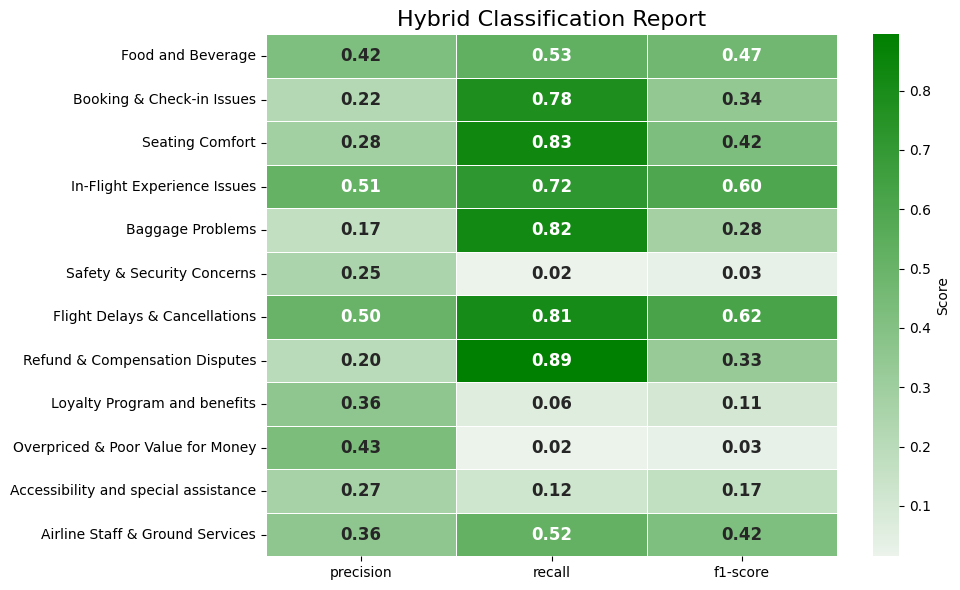

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report

# ──────────────────────────────────────────────────────────
# 1) Prepare true/pred multi-hot arrays for Hybrid model
# ──────────────────────────────────────────────────────────
mlb = MultiLabelBinarizer(classes=categories)
y_true = mlb.fit_transform(df_eval["manual_labels"])
y_pred = mlb.transform(df_eval["predicted_hybrid"])

# ──────────────────────────────────────────────────────────
# 2) Print Multi‑Label Classification Report
# ──────────────────────────────────────────────────────────
print("\n=== Hybrid Classification Report ===\n")
print(classification_report(
    y_true, y_pred, target_names=categories, zero_division=0, digits=4
))

# ──────────────────────────────────────────────────────────
# 3) Convert report to DataFrame for visualization
# ──────────────────────────────────────────────────────────
report_dict = classification_report(
    y_true, y_pred,
    target_names=categories,
    zero_division=0,
    output_dict=True,
    digits=4
)
report_df = pd.DataFrame(report_dict).T

# ──────────────────────────────────────────────────────────
# 4) Plot heatmap for Precision, Recall, F1-Score
# ──────────────────────────────────────────────────────────
plt.figure(figsize=(10, 6))
sns.heatmap(
    report_df.loc[categories, ['precision', 'recall', 'f1-score']],
    annot=True,
    fmt=".2f",
    cmap=sns.light_palette("green", as_cmap=True),
    cbar_kws={"label": "Score"},
    linewidths=0.5,
    linecolor="white",
    annot_kws={"weight": "bold", "size": 12}
)
plt.title("Hybrid Classification Report", fontsize=16)
plt.ylabel("")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


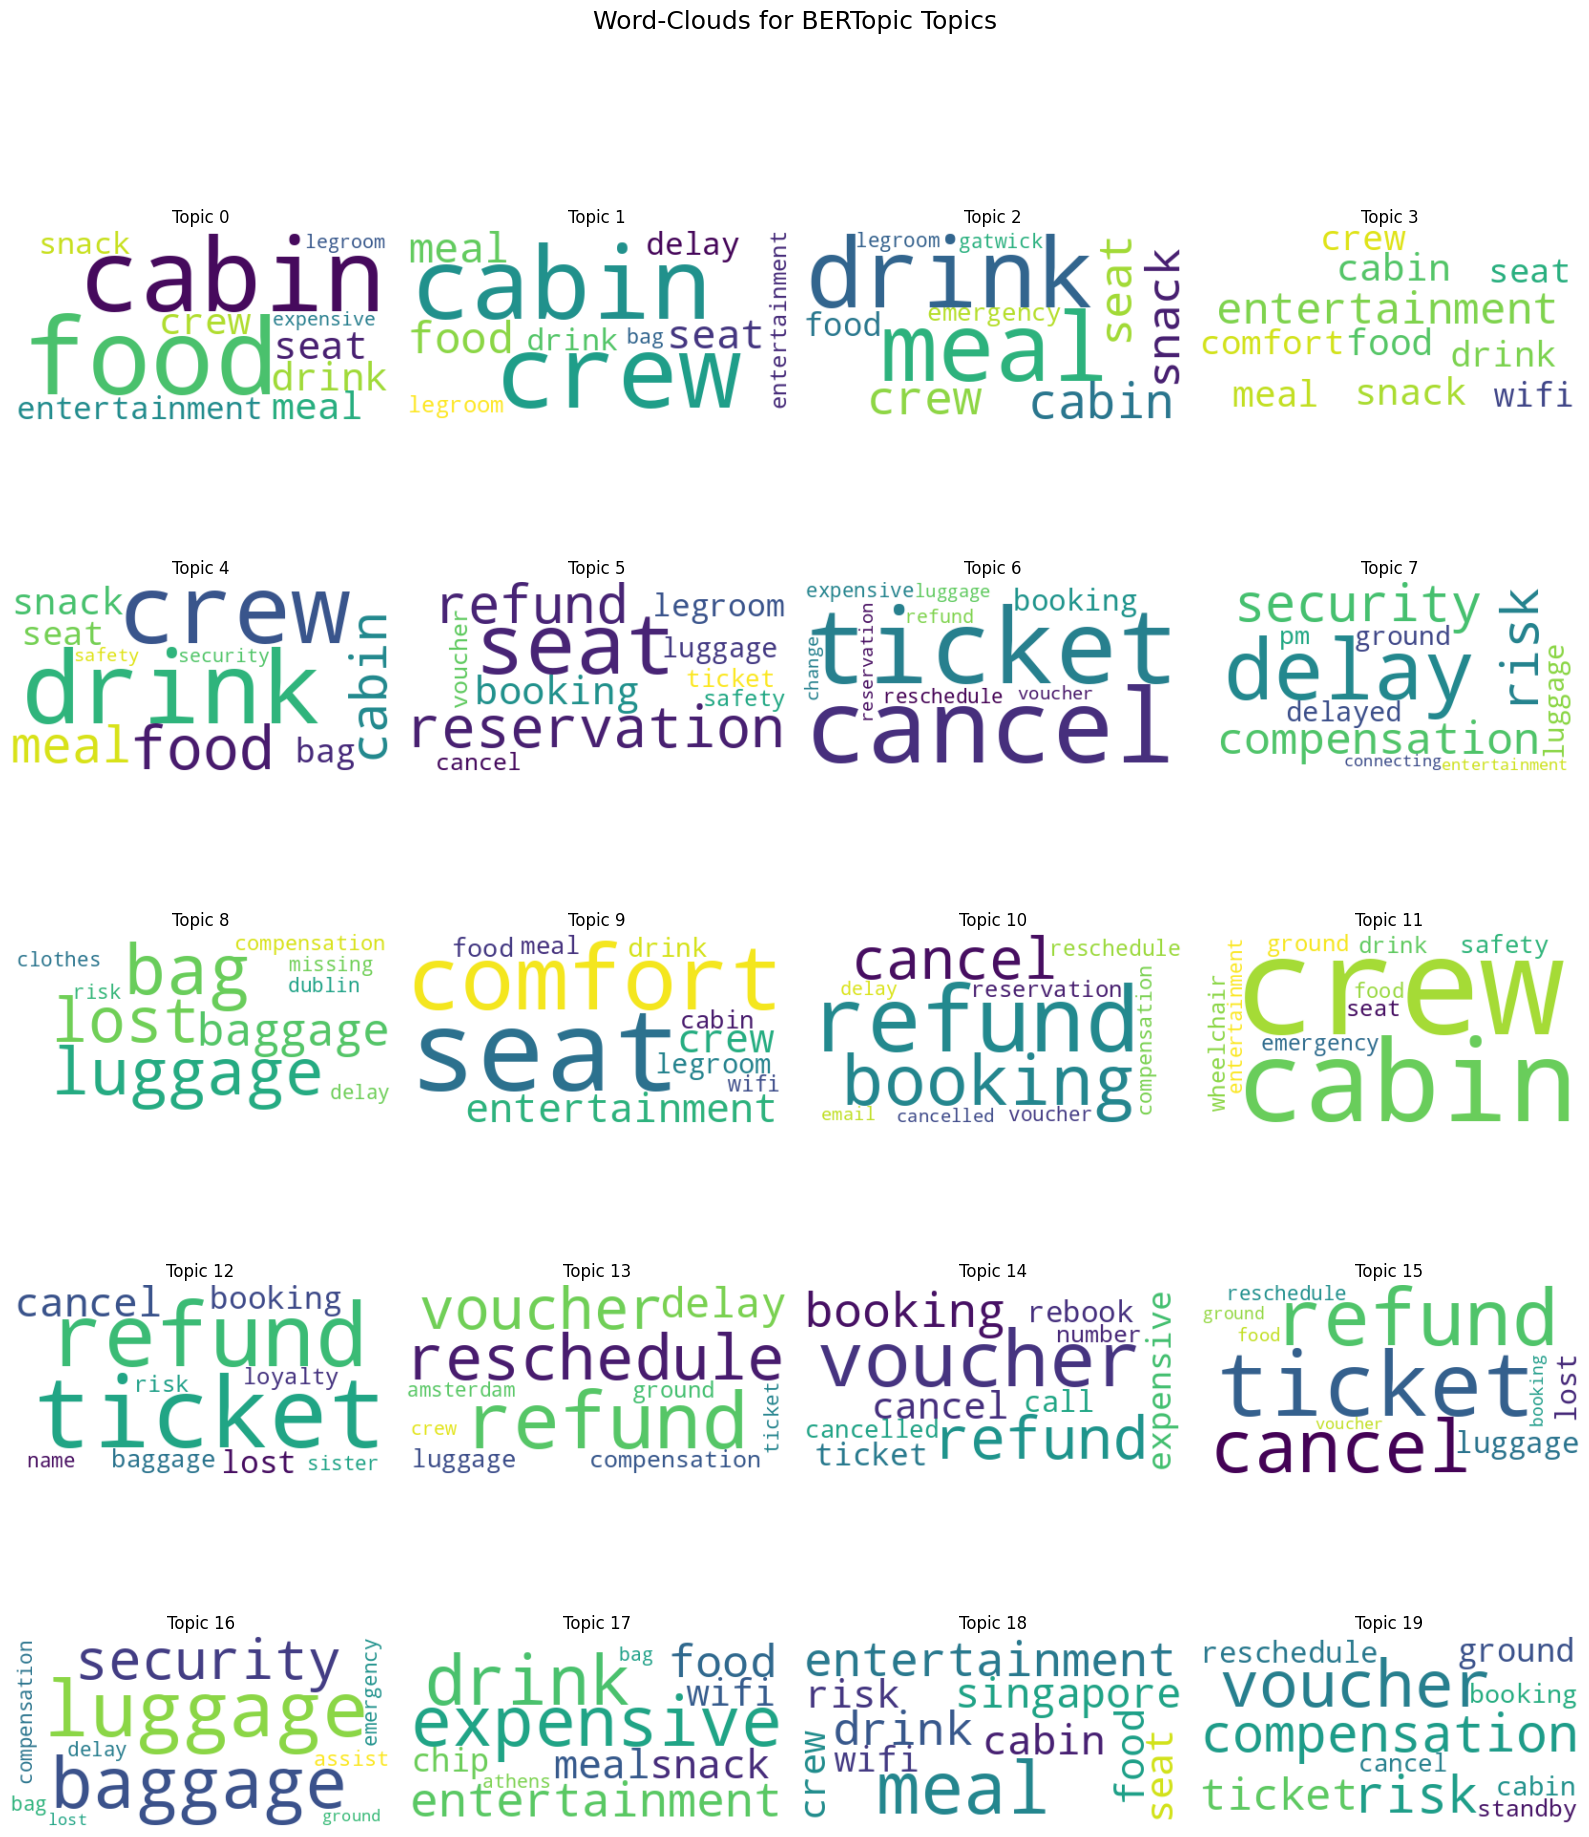

In [5]:
# ──────────────────────────────────────────────────────────
# I) Word‑Cloud Grid for All Topics
# ──────────────────────────────────────────────────────────
def plot_topic_wordclouds(topic_model, num_words=15, cols=4):
    info = topic_model.get_topic_info().query("Topic>=0")
    tids = info.Topic.tolist()
    rows = (len(tids)+cols-1)//cols
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols,4*rows), squeeze=False)
    fig.suptitle("Word‑Clouds for BERTopic Topics", fontsize=18)
    for idx, tid in enumerate(tids):
        freqs = dict(topic_model.get_topic(tid)[:num_words])
        wc = WordCloud(background_color="white", colormap="viridis"
                      ).generate_from_frequencies(freqs) if freqs else None
        r,c = divmod(idx, cols)
        ax = axes[r][c]
        if wc: ax.imshow(wc, interpolation="bilinear")
        ax.set_title(f"Topic {tid}", fontsize=12); ax.axis("off")
    for j in range(len(tids), rows*cols):
        r,c = divmod(j, cols); axes[r][c].axis("off")
    plt.tight_layout(rect=[0,0,1,0.96]); plt.show()

plot_topic_wordclouds(topic_model)

In [6]:
# interactive visualizations
topic_model.visualize_topics().show()
topic_model.visualize_barchart(top_n_topics=12, n_words=8).show()

In [7]:
import base64
from io import BytesIO
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ──────────────────────────────────────────────────────────
# 1) Generate & save word‑cloud grid as HTML
# ──────────────────────────────────────────────────────────
def save_wordclouds_html(topic_model, num_words=15, cols=4, outpath="BA_Airline_BERTopic_Wordclouds.html"):
    info = topic_model.get_topic_info().query("Topic >= 0")
    tids = info.Topic.tolist()
    rows = (len(tids) + cols - 1) // cols

    # start HTML
    html = [
        "<!DOCTYPE html><html><head><meta charset='utf-8'/>",
        "<title>BERTopic Word‑Clouds</title>",
        "<style>",
        "  .grid { display: grid;",
        f"           grid-template-columns: repeat({cols}, 1fr);",
        "           gap: 20px; padding:20px; }",
        "  .item { text-align: center; font-family: sans-serif; }",
        "  .item h2 { font-size: 1em; margin-bottom: 8px; }",
        "</style>",
        "</head><body>",
        "<h1>BERTopic Word‑Clouds</h1>",
        "<div class='grid'>"
    ]

    for tid in tids:
        freqs = dict(topic_model.get_topic(tid)[:num_words])
        wc = WordCloud(background_color="white", colormap="viridis") \
                .generate_from_frequencies(freqs) if freqs else None

        # render to PNG
        buf = BytesIO()
        wc.to_image().save(buf, format="PNG")
        img_b64 = base64.b64encode(buf.getvalue()).decode()

        title = info.set_index("Topic").loc[tid, "Name"]
        html += [
            "<div class='item'>",
            f"<h2>Topic {tid}: {title}</h2>",
            f"<img src='data:image/png;base64,{img_b64}'/>",
            "</div>"
        ]

    html += ["</div></body></html>"]

    with open(outpath, "w") as f:
        f.write("\n".join(html))

    print(f"✅ Saved word‑cloud grid to {outpath}")

# call it:
save_wordclouds_html(topic_model, num_words=15, cols=4, outpath="BA_Airline_BERTopic_Wordclouds.html")




✅ Saved word‑cloud grid to BA_Airline_BERTopic_Wordclouds.html


In [8]:
# ──────────────────────────────────────────────────────────
# II) Save BERTopic Interactive Map & Barchart
# ──────────────────────────────────────────────────────────
fig_topics   = topic_model.visualize_topics()
fig_barchart = topic_model.visualize_barchart(top_n_topics=12, n_words=8)

fig_topics.write_html("BA_Airline_BERTopic_Visualization.html")
fig_barchart.write_html("BA_Airline_BERTopic_Barchart.html")

print("✅ Saved interactive topics → BA_Airline_BERTopic_Visualization.html")
print("✅ Saved bar‑chart → BA_Airline_BERTopic_Barchart.html")

✅ Saved interactive topics → BA_Airline_BERTopic_Visualization.html
✅ Saved bar‑chart → BA_Airline_BERTopic_Barchart.html


In [9]:
from ast import literal_eval

# 1. Hybrid labels are already in df_full["zs_preds"] and df_full["bt_preds"]
df_full["hybrid_labels"] = df_full.apply(
    lambda row: list(set(row["zs_preds"]) | set(row["bt_preds"])), axis=1
)

# 2. Build topic-to-category mapping (already in topic2class)
#    Now, extract top keywords per predicted topic
def extract_topic_keywords(labels, topic2class, topic_model, top_n=10):
    keywords = []
    for tid, cat in topic2class.items():
        if cat in labels:
            keywords.extend([word for word, _ in topic_model.get_topic(tid)[:top_n]])
    return list(set(keywords))

df_full["topic_keywords"] = df_full["bt_preds"].apply(
    lambda cats: extract_topic_keywords(cats, topic2class, topic_model)
)

# 3. Combine keywords into a string for LLM input
df_full["related_terms"] = df_full["topic_keywords"].apply(lambda kws: ", ".join(kws))

# 4. Save enriched CSV
df_full.to_csv("BA_Airline_BERTopicReviews_WithKeywords.csv", index=False)
